# Employee Insights Hub By DATA-DYNAMOS


## Introduction:

Welcome to the Employee Insights Hub, a dynamic HR analytics initiative brought to you by ResolVI, a dynamic and innovative startup specializing in cutting-edge Human Resources (HR) solutions. At ResolVI, we are passionate about transforming workplaces and optimizing organizational efficiency. Our mission is to revolutionize HR practices by leveraging technology and data-driven insights.

## Company Presentation:

ResolVI is committed to empowering organizations with advanced HR solutions that drive strategic decision-making and enhance employee engagement. With a keen focus on innovation, ResolVI stands at the forefront of revolutionizing HR practices. Our team is dedicated to delivering high-quality, tailored solutions that meet the unique needs of each client.

## Description:

The Employee Insights Hub is a comprehensive HR analytics project aimed at empowering organizations to unlock actionable insights from their employee data. By providing a centralized platform for in-depth analysis of workforce demographics, performance trends, and engagement metrics, this initiative enables organizations to make informed decisions that drive organizational success.

## Project Overview:

In this Jupyter Notebook report, we present the findings and insights derived from our analysis using the Employee Insights Hub. Through a series of visualizations and data interpretations, we explore key aspects of workforce dynamics, including salary trends, educational qualifications, sources of employment, and contract types. Our goal is to provide stakeholders with valuable insights to optimize talent management, drive employee satisfaction, and propel organizations towards peak performance.

#### Library import

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Importing Datasets

In [103]:
# Reading the data
df1 = pd.read_excel("administration_data.xlsx")
df2 = pd.read_excel("emp_data.xlsx")
df3 = pd.read_csv("Coursera_trainings.csv")
df4 = pd.read_csv("attendance_dataset_2023.csv")
df5 = pd.read_excel("departments.ods", engine="odf")

# Displaying the first few rows of each DataFrame
print("df1:")
print(df1.head())

print("\ndf2:")
print(df2.head())

print("\ndf3:")
print(df3.head())

print("\ndf4:")
print(df4.head())

print("\ndf5:")
print(df5.head())

df1:
                                   CODE       NAME_EMP GENDER  \
0  3662067b-b6fe-4aae-9cdc-3818aabe0f6b   Tony Freeman      F   
1  9dc32ab1-c05c-4016-9b76-df80a0407b01   Donna Larson      F   
2  30c476ef-6058-4f8c-985b-56ae3eeb135d  Lauren Santos      M   
3  339aaafb-a155-4058-81f4-78647f1c78e1  David Kennedy      M   
4  9d04f05c-5f3a-40fc-85e8-834ee5a7c9e6   Casey Turner      M   

                                             ADDRESS  MARITAL_STATUS  \
0           1087 Blake Spring\nLindsayland, GU 63148               0   
1    86475 White Ports Suite 192\nMooreton, WV 86516               0   
2  9702 Wilson Falls Suite 470\nDennisfort, VT 52820               1   
3                   Unit 6731 Box 3814\nDPO AA 82476               0   
4  56039 Steven Springs Apt. 717\nMarkmouth, ID 9...               0   

          Grade TYPE_DIPLOMA  EXP_YEARS                      EMAIL  \
0            RH       Master         17   tony_freeman@example.com   
1            RH      Licence   

### Missing values visualization

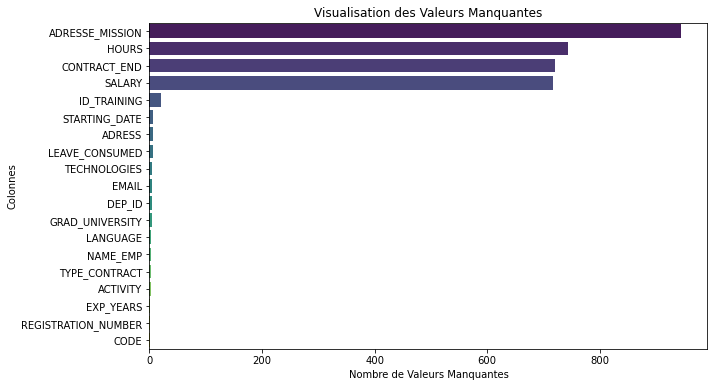

In [4]:
missing_values = df2.isnull().sum()

# Trier les colonnes par nombre de valeurs manquantes
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Créer un diagramme à barres pour visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='viridis')
plt.title('Visualisation des Valeurs Manquantes')
plt.xlabel('Nombre de Valeurs Manquantes')
plt.ylabel('Colonnes')
plt.show()

In [6]:
#transform to DateTime
#administration_data
df1["STARTING_DATE"]=pd.to_datetime(df1["STARTING_DATE"])
df1["CONTRACT_START"]=pd.to_datetime(df1["CONTRACT_START"])
df1["CONTRACT_END"]=pd.to_datetime(df1["CONTRACT_END"])
#attendance_dataset_2023
df4["Date"]=pd.to_datetime(df4["Date"])

### Number of employees

1) number of employees in administration department:

In [7]:
# Number of employees in administration_data
num_employees_administration = len(df1)
print("Number of employees in administration_data:", num_employees_administration)

Number of employees in administration_data: 1279


2) number of employees per department:

In [8]:
# Number of employees in emp_data
num_employees = len(df2)
print("Number of employees in emp_data table:", num_employees)

Number of employees in emp_data table: 1461


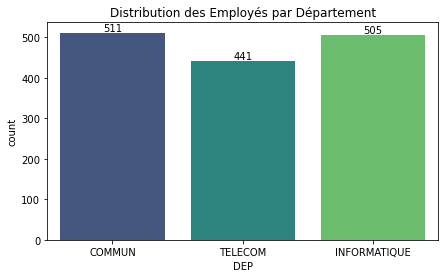

In [9]:
df_merged = pd.merge(df2, df5, left_on='DEP_ID', right_on='ID_DEP', how='left')

# Visualisation de la distribution des employés par département
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='DEP', data=df_merged, palette='viridis')

# Ajout d'annotations pour afficher le nombre exact d'employés au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution des Employés par Département')
plt.show()

The employees distribution shows approximately equal distribution within departements. The communication department has the higher number of employees given by 511 employee followed by the IT deparement given by 505 employee then the TELECOM department with 441 employee.

## Gender and marital status Distribution:

1) Administration department:

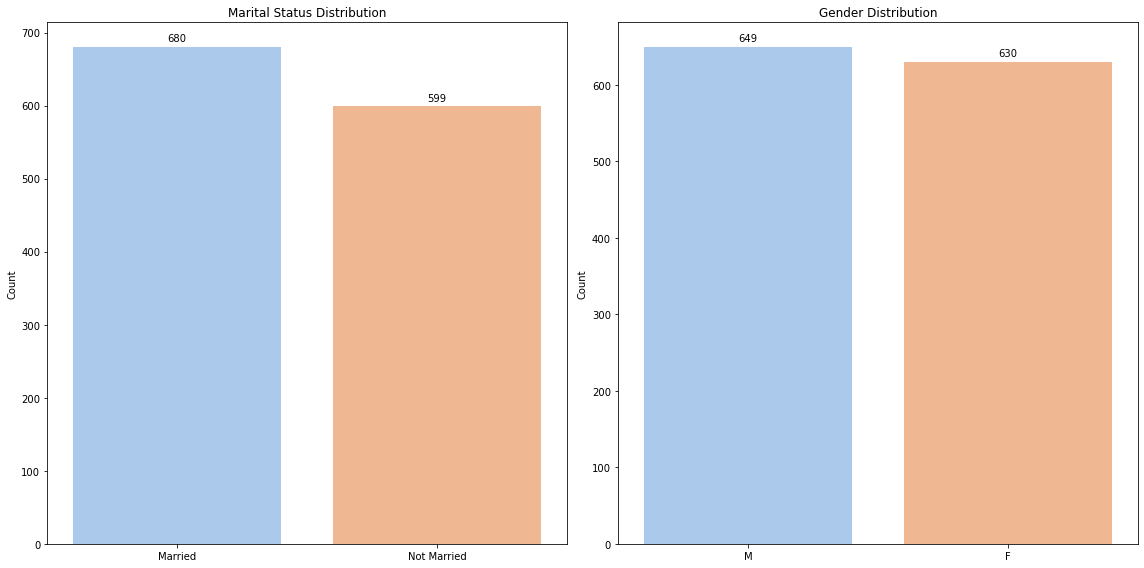

In [11]:
# Change categorical values to descriptive labels
df1['MARITAL_STATUS'] = df1['MARITAL_STATUS'].replace({1: 'Married', 0: 'Not Married'})
df1['GENDER'] = df1['GENDER'].replace({1: 'Male', 0: 'Female'})

# Count the number of employees by social status and gender
social_status_counts = df1['MARITAL_STATUS'].value_counts()
gender_counts = df1['GENDER'].value_counts()

# Create figure and axes for bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Marital Status
sns.barplot(x=social_status_counts.index, y=social_status_counts.values, ax=axes[0], palette='pastel')
axes[0].set_title('Marital Status Distribution')
axes[0].set_ylabel('Count')

# Display the exact numbers on top of each bar
for i, count in enumerate(social_status_counts):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom')

# Plot for Gender
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[1], palette='pastel')
axes[1].set_title('Gender Distribution')
axes[1].set_ylabel('Count')

# Display the exact numbers on top of each bar
for i, count in enumerate(gender_counts):
    axes[1].text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In the administration department, the distribution of employees by marital status shows a slight predominance of married individuals, with 680 married employees compared to 599 who are not married. However, the gender distribution within this department is fairly balanced, with 649 male employees and 630 female employees, indicating a relatively equal representation across genders.

2) Others departments:

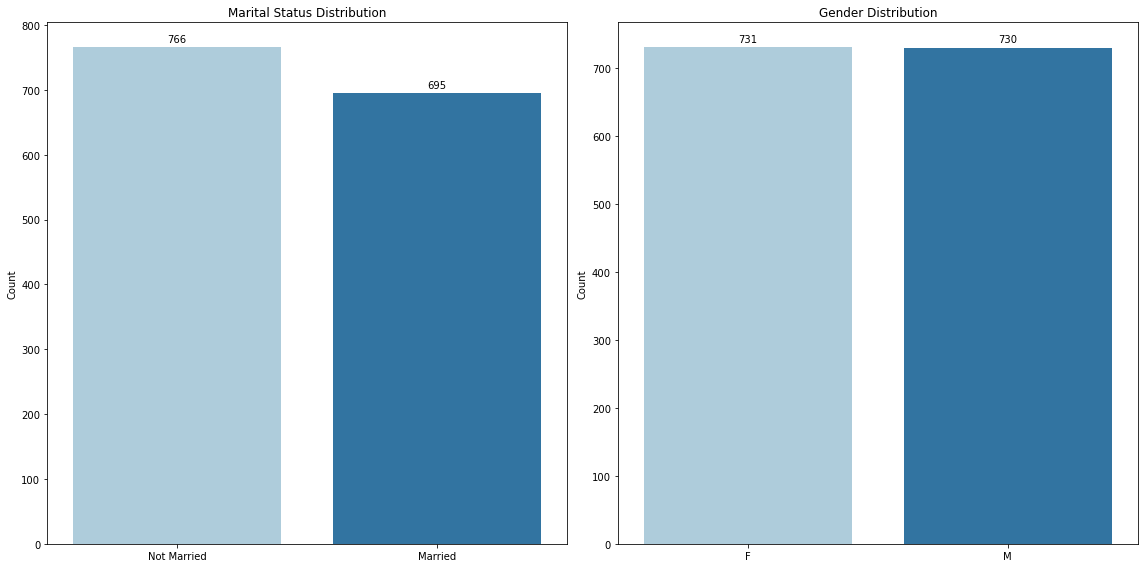

In [13]:

# Change categorical values to descriptive labels
df2['MARITAL_STATUS'] = df2['MARITAL_STATUS'].replace({1: 'Married', 0: 'Not Married'})
df2['GENDER'] = df2['GENDER'].replace({1: 'Male', 0: 'Female'})

# Count the number of employees by social status and gender
social_status_counts = df2['MARITAL_STATUS'].value_counts()
gender_counts = df2['GENDER'].value_counts()

# Create figure and axes for bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot for Marital Status
sns.barplot(x=social_status_counts.index, y=social_status_counts.values, ax=axes[0], palette='Paired')
axes[0].set_title('Marital Status Distribution')
axes[0].set_ylabel('Count')

# Display the exact numbers on top of each bar
for i, count in enumerate(social_status_counts):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom')

# Plot for Gender
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[1], palette='Paired')
axes[1].set_title('Gender Distribution')
axes[1].set_ylabel('Count')

# Display the exact numbers on top of each bar
for i, count in enumerate(gender_counts):
    axes[1].text(i, count + 5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

On the broader scale of other departments, the trend is slightly different. While there are still a considerable number of married employees at 695, there are more individuals who are not married, totaling 766. Similarly, the gender distribution across these departments remains nearly equal, with 730 male employees and 731 female employees, reflecting a balanced representation of genders within these departments.

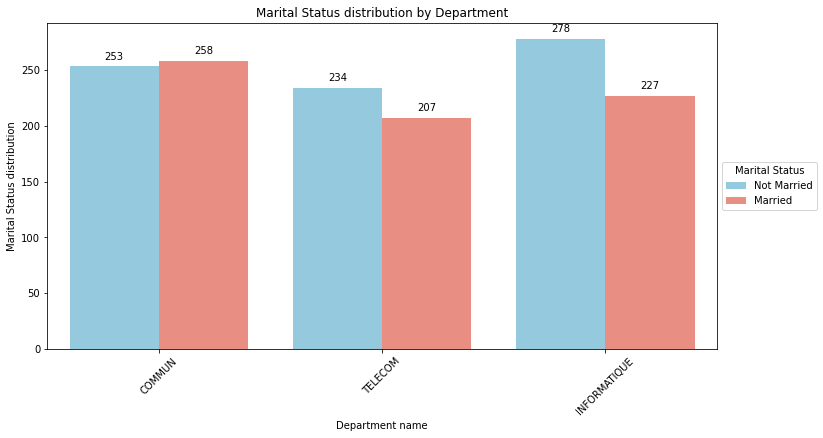

In [14]:
df_merged = pd.merge(df2, df5, left_on='DEP_ID', right_on='ID_DEP', how='left')

# Define a custom palette with swapped colors for marital status
custom_palette = {'Married': 'salmon', 'Not Married': 'skyblue'}

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='DEP', data=df_merged, hue='MARITAL_STATUS', palette=custom_palette)

# Add exact numbers above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Marital Status distribution by Department')
plt.xlabel('Department name')
plt.ylabel('Marital Status distribution')
plt.xticks(rotation=45)

# Create a separate legend for department names and colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Marital Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

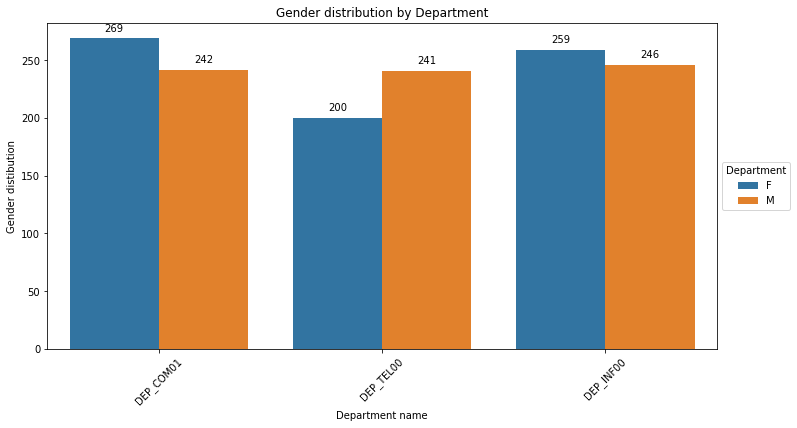

In [15]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='DEP_ID', data=df2, hue='GENDER')

# Add exact numbers above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender distribution by Department')
plt.xlabel('Department name')
plt.ylabel('Gender distibution')
plt.xticks(rotation=45)

# Create a separate legend for department names and colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Department', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

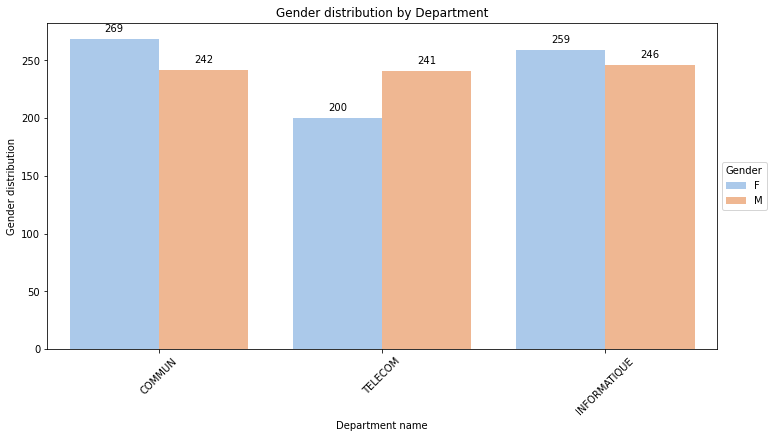

In [16]:
df_merged = pd.merge(df2, df5, left_on='DEP_ID', right_on='ID_DEP', how='left')

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='DEP', data=df_merged, hue='GENDER', palette= 'pastel')

# Add exact numbers above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender distribution by Department')
plt.xlabel('Department name')
plt.ylabel('Gender distribution')
plt.xticks(rotation=45)

# Create a separate legend for department names and colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Gender', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Examining each department individually, the communication department exhibits a balanced distribution of marital status, with 258 married employees and 253 unmarried ones. However, in terms of gender, there is a notable difference, with 269 female employees outnumbering the 242 male employees in this department.

In contrast, the telecom department shows a higher proportion of married employees, with 234 individuals married compared to 207 unmarried. The gender distribution in this department also skews towards male employees, with 241 males compared to 200 females.

In the informatique department, the distribution of marital status is reversed, with 278 unmarried employees surpassing the 227 who are married. The gender distribution is slightly skewed towards male employees, with 259 males and 246 females in this department. Overall, these insights provide valuable understanding into the demographics of employees across different departments, highlighting variations in marital status and gender representation that may impact organizational dynamics.

### Employee Distribution according to their contract Status:

1) Administration department:

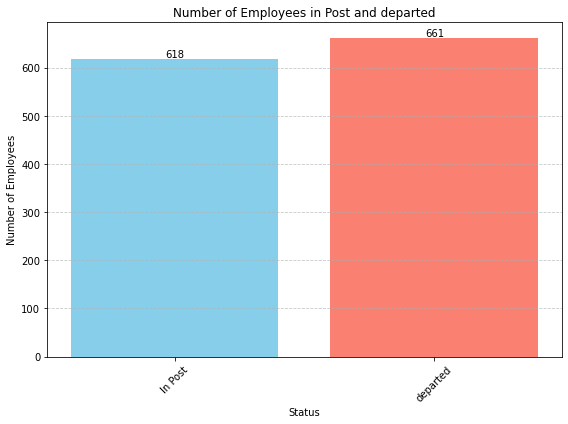

In [17]:
# Calculate the number of ongoing contracts (in post) in administration_data
num_ongoing_contracts = df1['CONTRACT_END'].notnull().sum()

# Calculate the number of departed employees (parti) in emp_data
num_departed_employees = df1['CONTRACT_END'].isnull().sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['In Post', 'departed'], [num_ongoing_contracts, num_departed_employees], color=['skyblue', 'salmon'])

# Add text annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.title('Number of Employees in Post and departed')
plt.xlabel('Status')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2) Others departments:

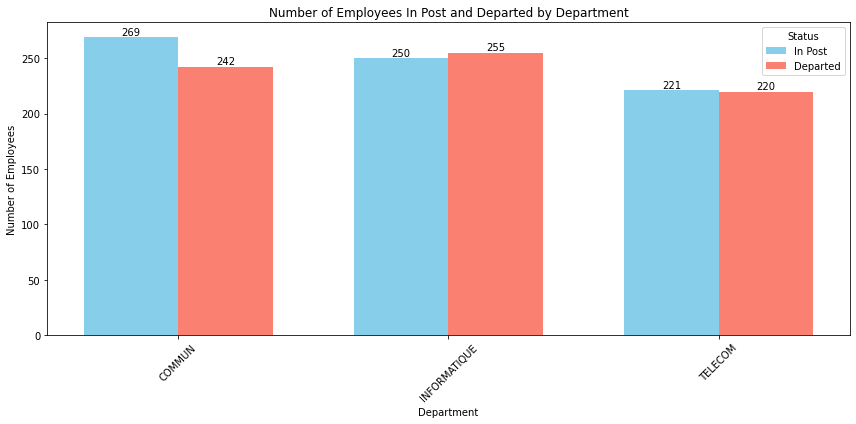

In [18]:
# Merge df2 with department data
df_merged_emp = pd.merge(df2, df5, left_on='DEP_ID', right_on='ID_DEP', how='left')

# Filter data to include only employees in post and departed
df_in_post = df_merged_emp[df_merged_emp['CONTRACT_END'].notnull()]
df_departed = df_merged_emp[df_merged_emp['CONTRACT_END'].isnull()]

# Group by department and count the number of employees in post and departed
in_post_counts = df_in_post.groupby('DEP').size().reset_index(name='In Post')
departed_counts = df_departed.groupby('DEP').size().reset_index(name='Departed')

# Merge the counts
df_counts = pd.merge(in_post_counts, departed_counts, on='DEP', how='outer').fillna(0)

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
departments = np.arange(len(df_counts))

plt.bar(departments, df_counts['In Post'], width=bar_width, color='skyblue', label='In Post')
plt.bar(departments + bar_width, df_counts['Departed'], width=bar_width, color='salmon', label='Departed')

# Add exact numbers above each bar
for i, (in_post, departed) in enumerate(zip(df_counts['In Post'], df_counts['Departed'])):
    plt.text(i, in_post + 0.5, str(in_post), ha='center', va='bottom')
    plt.text(i + bar_width, departed + 0.5, str(departed), ha='center', va='bottom')

plt.title('Number of Employees In Post and Departed by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(departments + bar_width / 2, df_counts['DEP'])
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Contracts visualization:

1) Administration department:

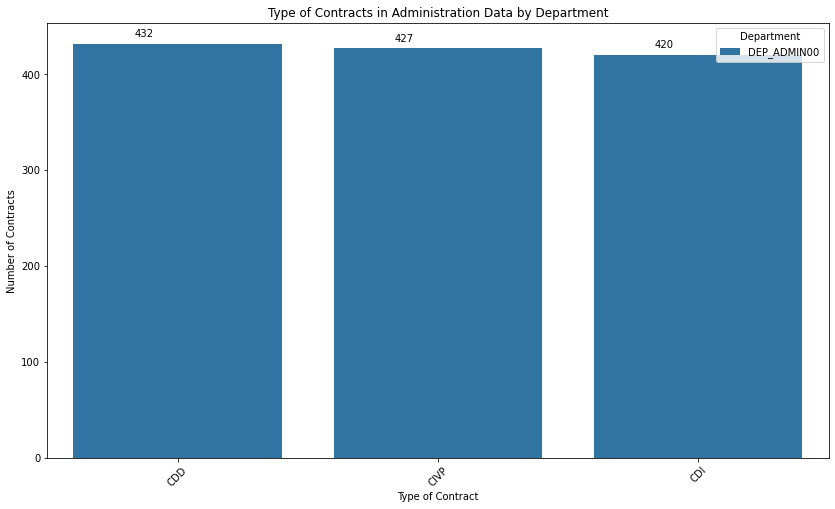

In [19]:
# Plot for administration_data
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='TYPE_CONTRACT', data=df1, hue='DEP_ID')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 3., p.get_height()), ha='center', va='center', xytext=(1, 10), textcoords='offset points')

plt.title('Type of Contracts in Administration Data by Department')
plt.xlabel('Type of Contract')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.show()

2) other departments:

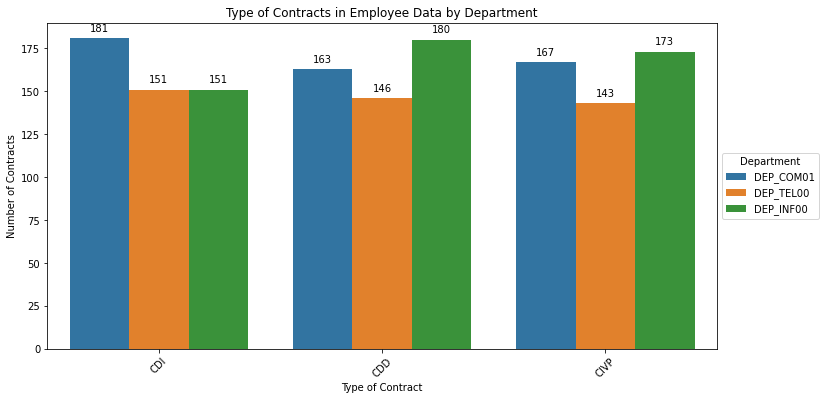

In [20]:
# Plot for emp_data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TYPE_CONTRACT', data=df2, hue='DEP_ID')

# Add exact numbers above each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Type of Contracts in Employee Data by Department')
plt.xlabel('Type of Contract')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)

# Create a separate legend for department names and colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Department', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Understanding Salary Trends

1) Administration department:

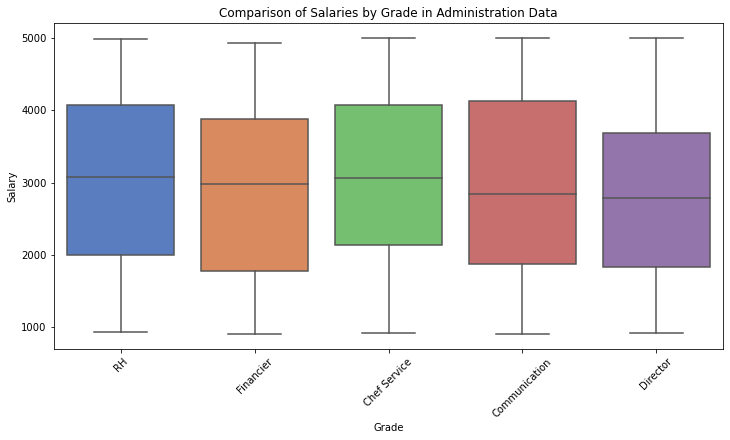

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grade', y='SALARY', data=df1, palette='muted')
plt.title('Comparison of Salaries by Grade in Administration Data')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

The bar graph titled "Average Salary per Grade" provides insights into the average salary for different job grades within the organization. From the data presented:

The average salary for Directors, represented by the highest average salary of 3071.04, command the most substantial compensation, reflecting their seniority and leadership positions within the organization. 
RH (Human Resources) positions stands at 3042.32, indicating that employees in this role receive relatively high compensation within the organization.
Financiers follow closely with an average salary of 2938.90, suggesting that individuals in finance-related roles also command competitive pay.
Employees in Chef Service positions have an average salary of 2809.32, indicating slightly lower compensation compared to RH and Financiers but still within a respectable range.
Communication roles have an average salary of 2872.77, suggesting that employees in this department also receive favorable compensation levels.

Overall, the bar graph underscores the varying salary levels across different job grades, with directors and RH positions standing out as the highest-paying roles within the organization. These insights provide valuable information for both employees and employers regarding salary benchmarks and compensation structures within the organization.

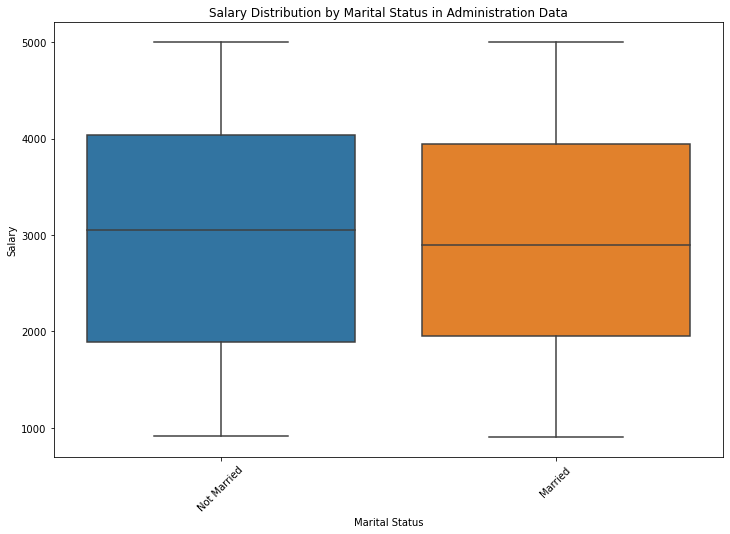

In [23]:

# Create a boxplot of salaries by marital status
plt.figure(figsize=(12, 8))
sns.boxplot(x='MARITAL_STATUS', y='SALARY', data=df1)
plt.title('Salary Distribution by Marital Status in Administration Data')
plt.xlabel('Marital Status')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


1) For administration department:

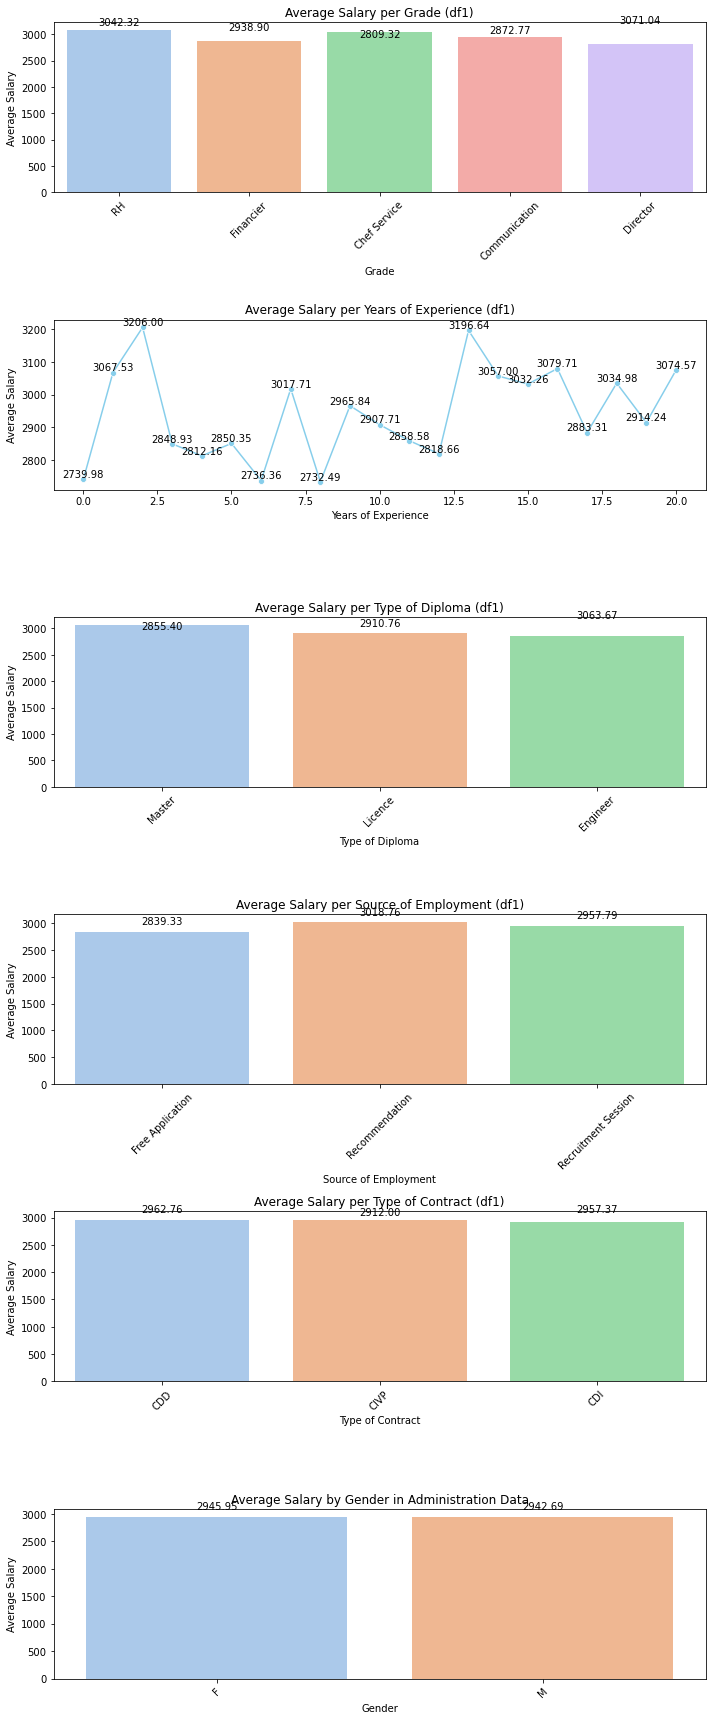

In [89]:

# Calculate average salary for each factor
avg_salaries_activity_df1 = df1.groupby('Grade')['SALARY'].mean().reset_index()
avg_salaries_exp_years_df1 = df1.groupby('EXP_YEARS')['SALARY'].mean().reset_index()
avg_salaries_type_diploma_df1 = df1.groupby('TYPE_DIPLOMA')['SALARY'].mean().reset_index()
avg_salaries_source_employment_df1 = df1.groupby('SOURCE_of_employment')['SALARY'].mean().reset_index()
avg_salaries_type_contract_df1 = df1.groupby('TYPE_CONTRACT')['SALARY'].mean().reset_index()
avg_salary_gender = df1.groupby('GENDER')['SALARY'].mean().reset_index()

# Plotting average salaries with bar plots
plt.figure(figsize=(10, 24))

# Plot for Activity
plt.subplot(6, 1, 1)
sns.barplot(x='Grade', y='SALARY', data=df1, ci=None, palette='pastel')
plt.title('Average Salary per Grade (df1)')
plt.xlabel('Grade')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_activity_df1['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

# Plot for Years of Experience
plt.subplot(6, 1, 2)
sns.lineplot(x='EXP_YEARS', y='SALARY', data=avg_salaries_exp_years_df1, marker='o', color='skyblue')
plt.title('Average Salary per Years of Experience (df1)')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
for index, row in avg_salaries_exp_years_df1.iterrows():
    plt.text(row['EXP_YEARS'], row['SALARY'], f'{row["SALARY"]:.2f}', ha='center', va='bottom')

# Plot for Type of Diploma
plt.subplot(6, 1, 3)
sns.barplot(x='TYPE_DIPLOMA', y='SALARY', data=df1, ci=None, palette='pastel')
plt.title('Average Salary per Type of Diploma (df1)')
plt.xlabel('Type of Diploma')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_type_diploma_df1['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

# Plot for Source of Employment
plt.subplot(6, 1, 4)
sns.barplot(x='SOURCE_of_employment', y='SALARY', data=df1, ci=None, palette='pastel')
plt.title('Average Salary per Source of Employment (df1)')
plt.xlabel('Source of Employment')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_source_employment_df1['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

# Plot for Type of Contract
plt.subplot(6, 1, 5)
sns.barplot(x='TYPE_CONTRACT', y='SALARY', data=df1, ci=None, palette='pastel')
plt.title('Average Salary per Type of Contract (df1)')
plt.xlabel('Type of Contract')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_type_contract_df1['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')
# Plot bar chart of average salary by gender
plt.subplot(6, 1, 6)
sns.barplot(x='GENDER', y='SALARY', data=avg_salary_gender, palette='pastel')
plt.title('Average Salary by Gender in Administration Data')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salary_gender['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#### Average salary per experience years:

The line graph, titled "Average Salary per Years of Experience," illustrates the relationship between years of experience and average salary within the organization. From the data presented:

Employees with 0 years of experience have an average salary of 2739.98, indicating the starting salary for new hires.
Average salary peaks at 12.5 years of experience, reaching 3196.64, suggesting that employees with around 12.5 years of experience receive the highest compensation on average.
There are fluctuations in average salary across different years of experience, with variations observed at intervals such as 2.5, 5, 7.5, 10, 15, and 20 years.
Despite fluctuations, the overall trend shows an increase in average salary with increasing years of experience, peaking at 12.5 years, and remaining relatively stable thereafter.
The presence of high salaries among employees with lower years of experience challenges the traditional notion that salary levels correlate directly with tenure. Instead, it underscores the importance of specialized skills, displine, performance, and remunerations  in determining compensation.

#### Average Salary per Type of Diploma

The average salary per type of diploma provides valuable insights into the relationship between educational qualifications and compensation levels. Employees with master's degrees earn an average salary of 2855.40, while those with licenses earn slightly higher at 2910.76. However, individuals with specialized qualifications, such as engineers, command the highest average salary at 3063.67. This indicates that possessing technical expertise and specialized skills can significantly impact earning potential within the job market, with certain diploma types leading to higher compensation levels.

#### Average Salary per Source of Employment

The examination of the average salary per source of employment highlights variations in compensation levels based on the method of job acquisition. Professionals who secure positions through recommendations, represented as "Recommendation," earn the highest average salary at 3016.76. This suggests that referrals or recommendations from existing professionals may lead to higher-paying job opportunities. On the other hand, individuals recruited through recruitment sessions have slightly lower average salaries at 2957.79, while those in free application roles earn the lowest average salary at 2839.33. This disparity underscores the importance of networking, referrals, and recruitment strategies in accessing higher-paying job opportunities within the workforce.

#### Average Salary per Type of Contract:

The bar graph indicates significant differences in average salaries based on employment contract types. Employees under permanent contracts (CDI) earn the highest average salary at 2962.76, reflecting the stability and benefits associated with permanent employment. In contrast, those under fixed-term contracts (CDD) earn a substantially lower average salary at 2191.00, likely due to the temporary nature of these contracts. Intermittent contracts (CIVP) show comparable average salaries to permanent contracts at 2957.37, despite their intermittent nature.

#### Average Salary by Gender

The analysis of average salaries by gender in administration data indicates a slight discrepancy in compensation levels between male and female employees. Male employees in administration roles earn, on average, 2945, while female employees earn 2492, reflecting a relatively small difference in salaries. Despite this slight gap, it's important to recognize and address any disparities in compensation, as even minor differences can contribute to broader gender wage gaps and inequality within the workplace. By striving for equity in pay practices and fostering an inclusive work environment, organizations can promote fairness and equality for all employees.

#### Global interpretation:
Understanding Salary Trends provides a comprehensive overview of the factors influencing compensation levels within the organization. The analysis reveals significant variations in average salaries across different job grades, with directors and RH positions emerging as the highest-paying roles, reflecting seniority and specialized expertise. Moreover, the relationship between years of experience and average salary challenges conventional notions, highlighting high salaries among employees with lower years of experience and emphasizing the importance of specialized skills and performance in determining compensation. Additionally, disparities in average salaries based on educational qualifications, source of employment, employment contract types, and gender underscore the need for addressing inequalities and promoting fairness within the workforce. By recognizing and addressing these disparities, organizations can enhance employee satisfaction, productivity, and overall organizational performance, fostering a fair and inclusive work environment conducive to attracting and retaining top talent.



2) Others departments:

DEP_ID
DEP_COM01    2105.044934
DEP_INF00    2108.961564
DEP_TEL00    2100.273879
Name: SALARY, dtype: float64
DEP_ID
DEP_COM01    3496.842522
DEP_INF00    3494.298325
DEP_TEL00    3494.594481
Name: SALARY, dtype: float64


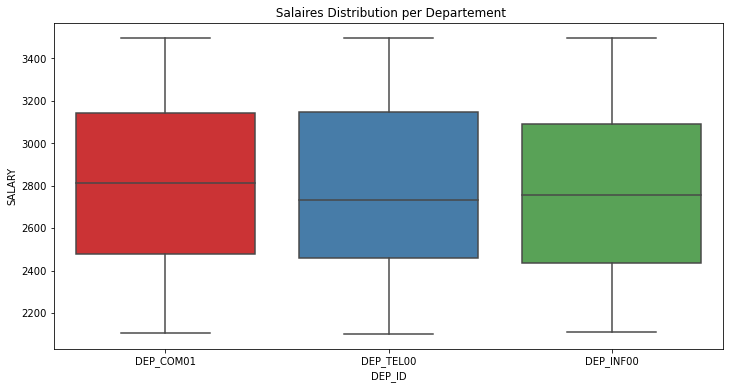

In [105]:
min_salaries = df2.groupby('DEP_ID')['SALARY'].min()
max_salaries = df2.groupby('DEP_ID')['SALARY'].max()
print (min_salaries)
print(max_salaries)
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEP_ID', y='SALARY', data=df2, palette='Set1')
plt.title(' Salaires Distribution per Departement')
plt.show()

Salary range is approxmatively between 2100 and 3500

This box plot suggests that salaries vary across departments in this organization. The "DEP_INFO" department has the highest median salary, while "DEP_COM01" has the lowest.

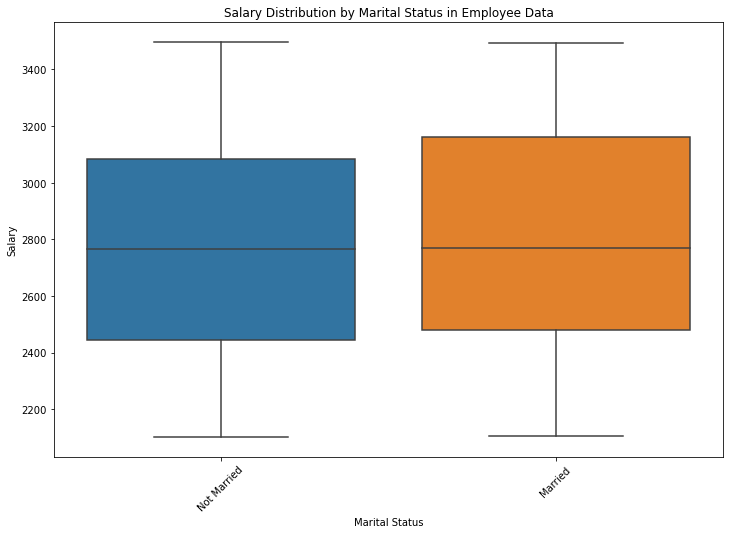

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='MARITAL_STATUS', y='SALARY', data=df2)
plt.title('Salary Distribution by Marital Status in Employee Data')
plt.xlabel('Marital Status')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

The boxplot displays the distribution of salaries for married and non-married individuals. 
The median salary for married individuals appears to be higher than the median salary for non-married individuals. This is because the box for "Married" is positioned higher than the box for "Not Married" on the y-axis.
This indicates that married individuals, on average, earn a higher salary compared to non-married individuals in this data set.

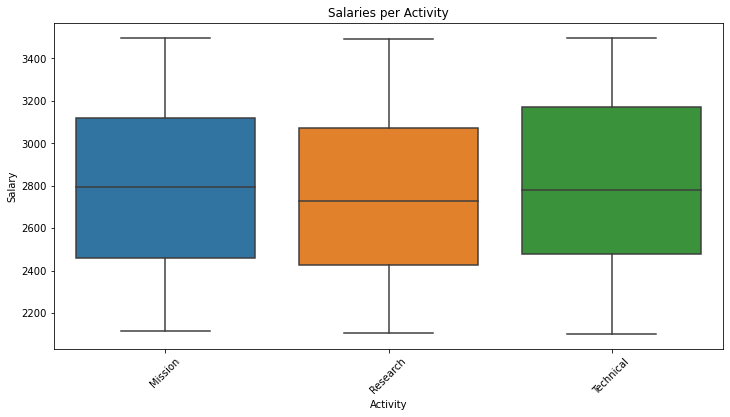

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ACTIVITY', y='SALARY', data=df2)
plt.title('Salaries per Activity')
plt.xlabel('Activity')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

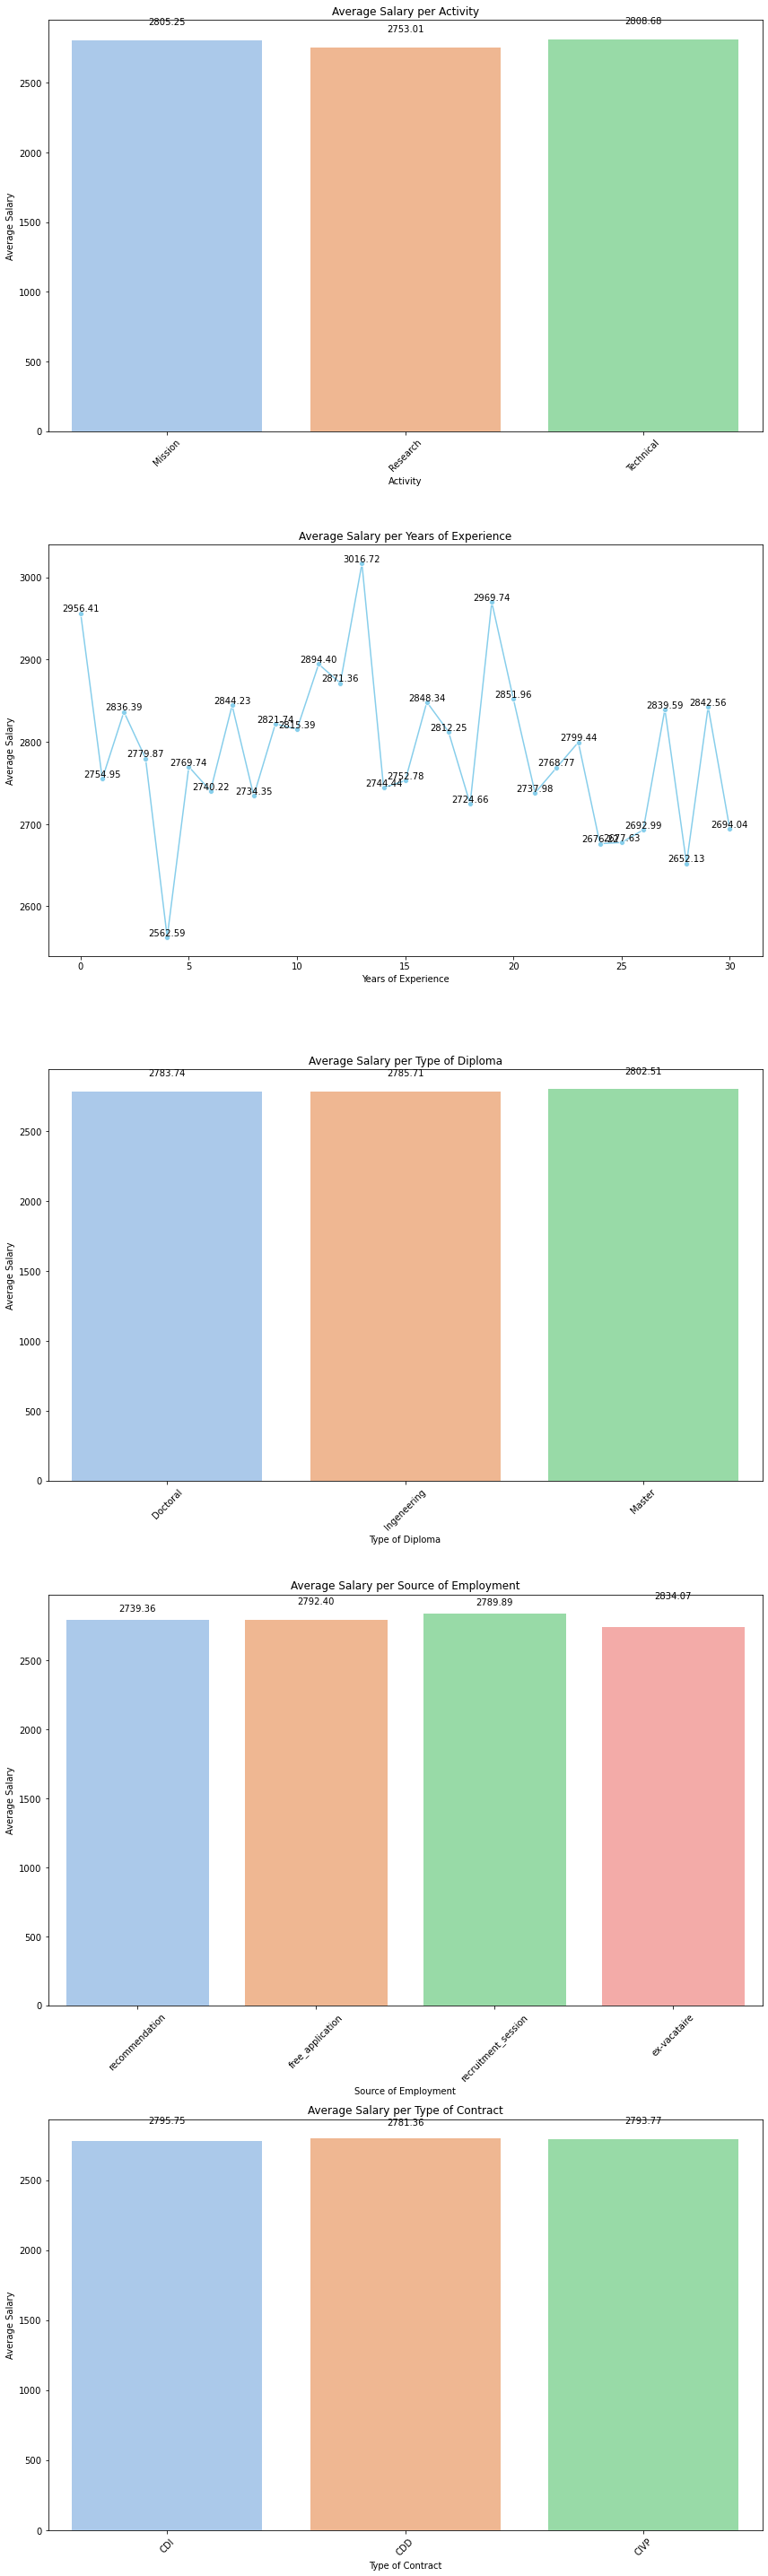

In [145]:

# Calculate average salary for each factor
avg_salaries_activity = df2.groupby('ACTIVITY')['SALARY'].mean().reset_index()
avg_salaries_exp_years = df2.groupby('EXP_YEARS')['SALARY'].mean().reset_index()
avg_salaries_type_diploma = df2.groupby('TYPE_DIPLOMA')['SALARY'].mean().reset_index()
avg_salaries_source_employment = df2.groupby('SOURCE_of_employment')['SALARY'].mean().reset_index()
avg_salaries_type_contract = df2.groupby('TYPE_CONTRACT')['SALARY'].mean().reset_index()

# Plotting average salaries with bar plots
plt.figure(figsize=(12, 40))

# Plot for Activity
plt.subplot(5, 1, 1)
sns.barplot(x='ACTIVITY', y='SALARY', data=df2, ci=None, palette='pastel')
plt.title('Average Salary per Activity')
plt.xlabel('Activity')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_activity['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

# Plot for Years of Experience
plt.subplot(5, 1, 2)
sns.lineplot(x='EXP_YEARS', y='SALARY', data=avg_salaries_exp_years, marker='o', color='skyblue')
plt.title('Average Salary per Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
for index, row in avg_salaries_exp_years.iterrows():
    plt.text(row['EXP_YEARS'], row['SALARY'], f'{row["SALARY"]:.2f}', ha='center', va='bottom')

# Plot for Type of Diploma
plt.subplot(5, 1, 3)
sns.barplot(x='TYPE_DIPLOMA', y='SALARY', data=df2, ci=None, palette='pastel')
plt.title('Average Salary per Type of Diploma')
plt.xlabel('Type of Diploma')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_type_diploma['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

# Plot for Source of Employment
plt.subplot(5, 1, 4)
sns.barplot(x='SOURCE_of_employment', y='SALARY', data=df2, ci=None, palette='pastel')
plt.title('Average Salary per Source of Employment')
plt.xlabel('Source of Employment')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_source_employment['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

# Plot for Type of Contract
plt.subplot(5, 1, 5)
sns.barplot(x='TYPE_CONTRACT', y='SALARY', data=df2, ci=None, palette='pastel')
plt.title('Average Salary per Type of Contract')
plt.xlabel('Type of Contract')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
for index, value in enumerate(avg_salaries_type_contract['SALARY']):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


#### Average Salary per Activity
The bar plot illustrates the distribution of employees across various activities within the organization. It shows that research, technical roles, and missions are the primary activities, each with a similar employee count. This suggests a well-rounded distribution of tasks and responsibilities, reflecting the diverse nature of roles within the organization.

####  Average Salary per Experience years
The line plot demonstrates the distribution of employees based on their years of experience. It reveals fluctuations in employee counts over the years, with peaks and troughs at certain experience milestones. While there's a relatively stable distribution across early years of experience, variations may indicate hiring cycles, retention efforts, or natural progression within the organization.

####  Average Salary per type of diploma
This bar plot showcases the distribution of employees based on their educational qualifications. It indicates a balanced representation of employees holding doctoral, engineering, and master's degrees. This suggests a diverse educational background among employees, highlighting the organization's commitment to recruiting talent from various academic disciplines.

####  Average Salary per source of employement
The bar plot displays the sources through which employees are recruited. It shows that the majority of employees are sourced through free applications, followed by recommendations and recruitment sessions. The presence of ex-vacataires also indicates a portion of the workforce transitioning from temporary positions to permanent roles, contributing to the organization's talent pool.

####  Average Salary per type of contract
This bar plot delineates the distribution of employees based on their contract types. It reveals a balanced distribution between fixed-term contracts (CDD), permanent contracts (CDI), and intermittent contracts (CIVP). This indicates a flexible employment structure within the organization, accommodating various contract types to meet organizational needs and employee preferences.


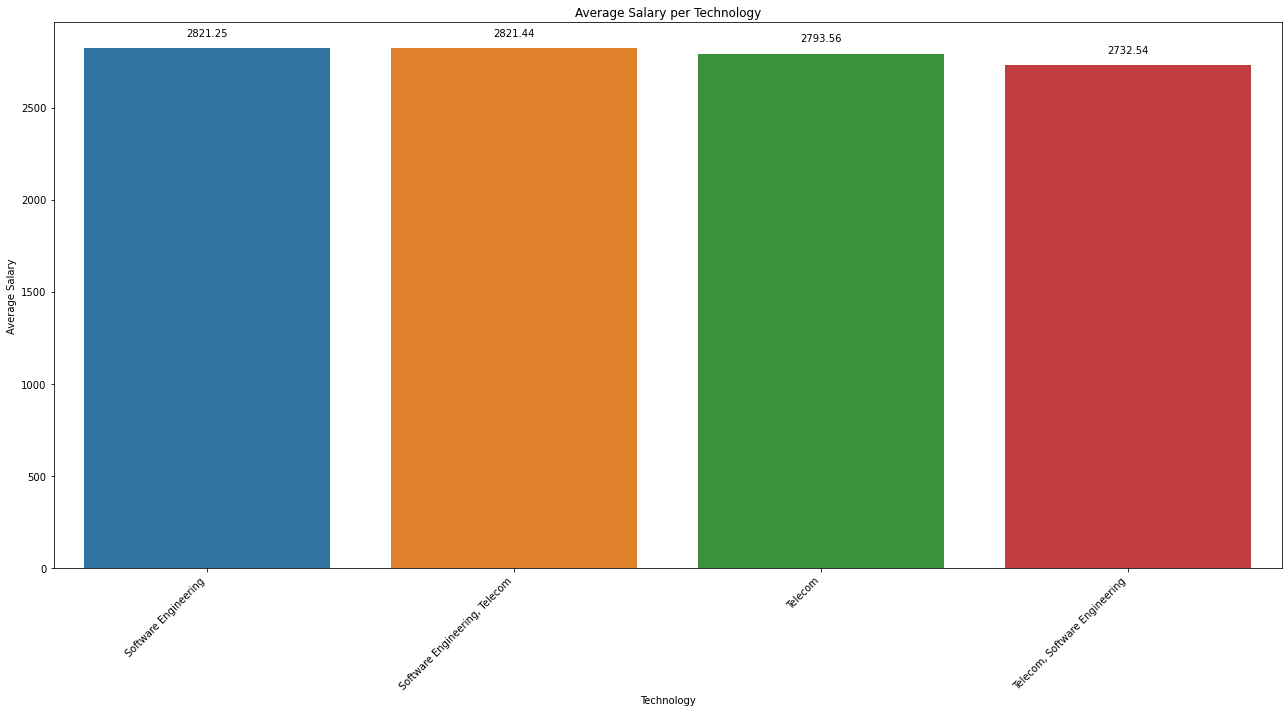

In [141]:
# Group by technology and calculate average salary
avg_salary_per_technology = df2.groupby('TECHNOLOGIES')['SALARY'].mean().reset_index()

# Plotting average salary per technology
plt.figure(figsize=(18, 10))
ax = sns.barplot(x='TECHNOLOGIES', y='SALARY', data=avg_salary_per_technology, ci=None)
plt.title('Average Salary per Technology')
plt.xlabel('Technology')
plt.ylabel('Average Salary')

# Adding numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The graph offers valuable insights into the average salaries associated with different technologies. For software engineering roles, the average salary stands at 2212.15, reflecting the compensation level for individuals specializing primarily in this field. Interestingly, for individuals with a background in software engineering but who have also acquired expertise in telecom, the average salary slightly increases to 2214.84, suggesting a minor salary boost for those with additional skills in telecom.

In contrast, telecom roles command a higher average salary of 2773.56, indicating the premium placed on expertise in this field. Moreover, individuals with a primary background in telecom but additional skills in software engineering still enjoy a respectable average salary of 2739.54, underscoring the value of versatile skills in both fields.

Overall, the data underscores the importance of skill specialization and versatility in determining salary levels within the technology sector, with telecom roles generally commanding higher compensation than software engineering roles.

#### Global interpretation:
The data provides valuable insights into salary distribution, highlighting departmental variations, the impact of marital status, and trends in employee demographics and experience levels. Additionally, it sheds light on the importance of educational backgrounds, recruitment strategies, and contract types in shaping compensation levels.

Understanding these factors is vital for informed decision-making and effective talent management within the organization. By leveraging these insights, organizations can optimize their recruitment, retention, and compensation strategies to attract and retain top talent, drive organizational success, and foster a fair and equitable work environment.

Overall, the data serves as a critical resource for the Employee Insights Hub project, enabling organizations to make data-driven decisions that enhance workforce management and support organizational objectives.

### Source of recrutments:

1) administration department:

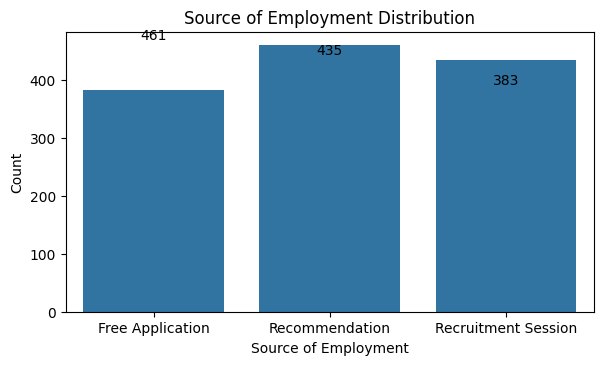

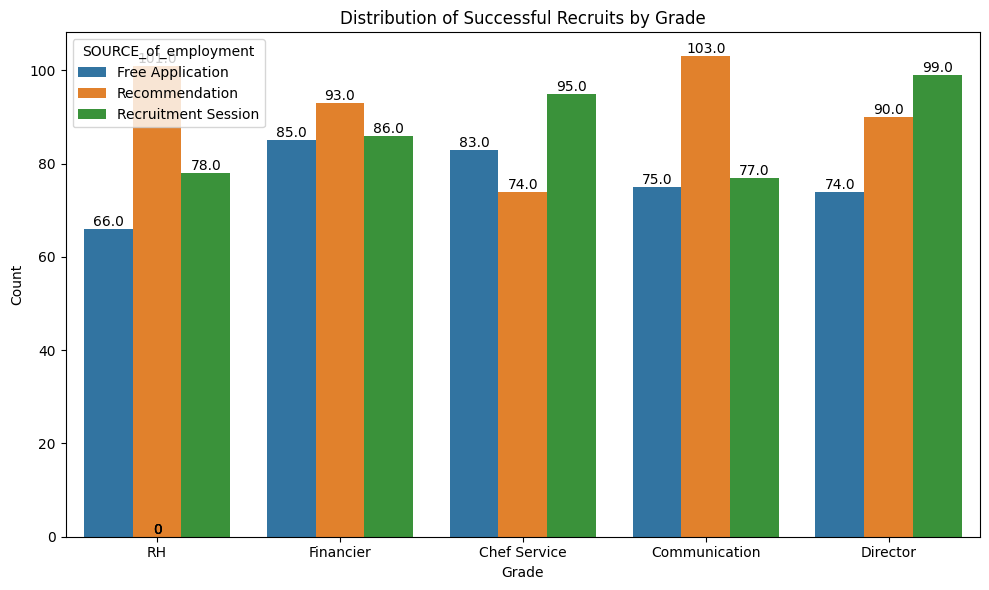

In [23]:
plt.figure(figsize=(15, 8))

# Source of Employment Distribution in administration_data
plt.subplot(2, 2, 1)
source_of_employment_counts = df1['SOURCE_of_employment'].value_counts()
sns.countplot(x='SOURCE_of_employment', data=df1)
plt.title('Source of Employment Distribution')
plt.xlabel('Source of Employment')
plt.ylabel('Count')
for index, value in enumerate(source_of_employment_counts):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

    #by grade
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Grade', hue='SOURCE_of_employment', data=df1)
plt.title('Distribution of Successful Recruits by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)


plt.tight_layout()
plt.show()

* In general the main source of employment is coming from "Recommendation"
* The grade R&H has the highest number of recruits from free applications, which suggests that this grade is either more popular or more accessible for candidates who apply on their own.

* The grades Financier and Communication have the highest number of recruits from recommendations and recruitment sessions, which implies that these grades require more specialized skills or qualifications that are best identified through referrals or interviews.

* The grade Chef Service has a balanced distribution of recruits from all sources except recruitment sessions, which indicates that this grade is not very selective or competitive and can attract candidates from various channels.

* The grade Director has the highest number of recruits from free applications, which could mean that this grade is either very prestigious or very challenging and requires candidates who are confident and motivated to apply on their own.

2) other departments:

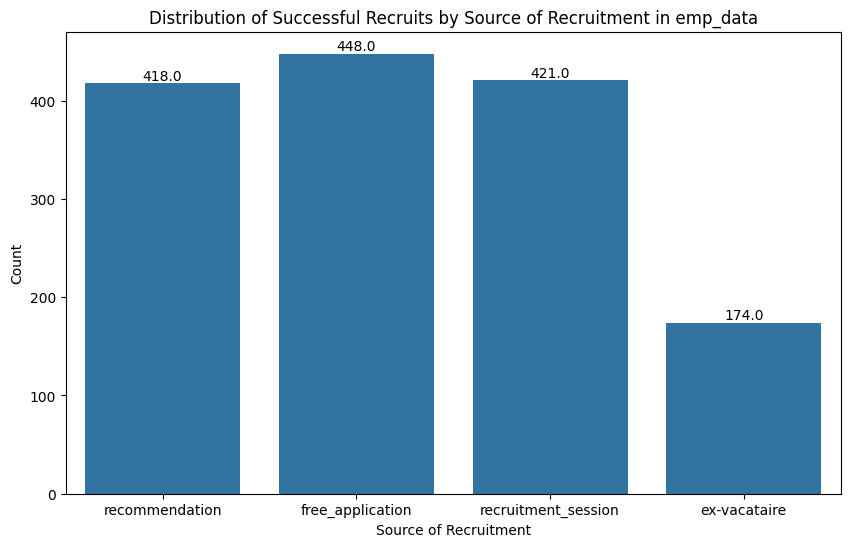

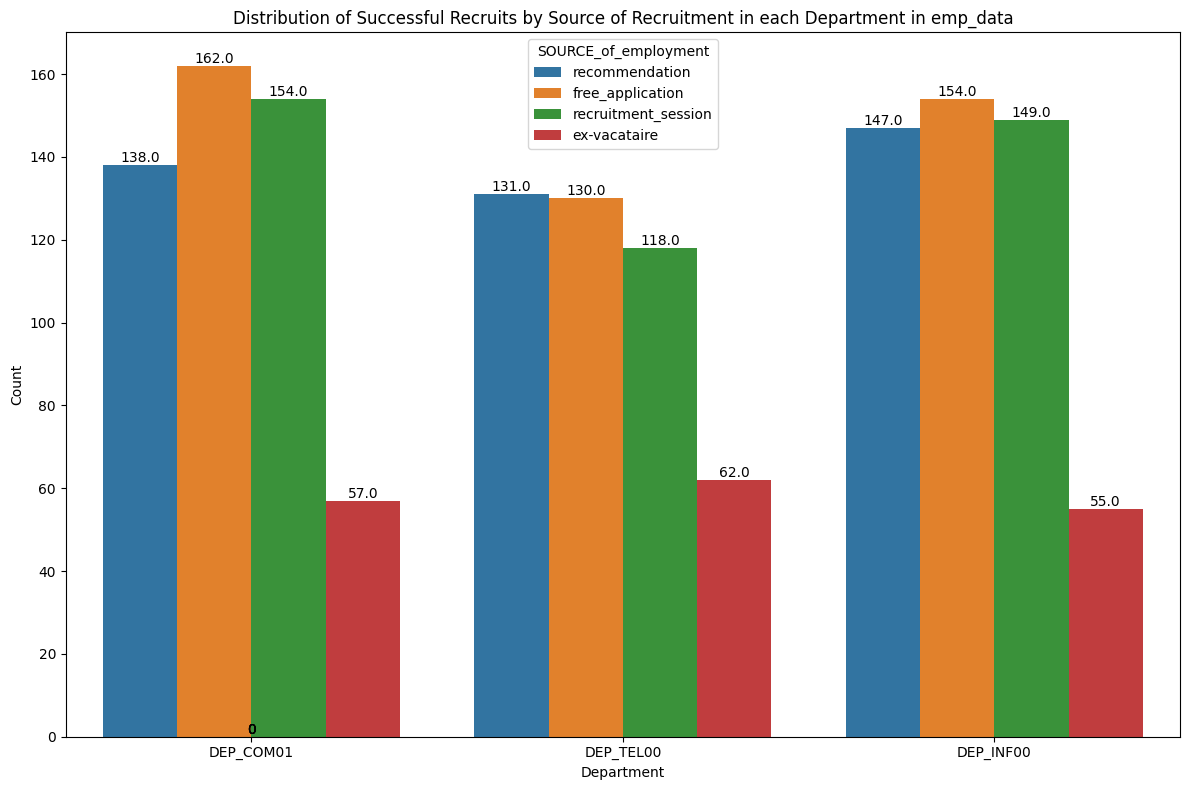

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SOURCE_of_employment', data=df2)
plt.title('Distribution of Successful Recruits by Source of Recruitment in emp_data')
plt.xlabel('Source of Recruitment')
plt.ylabel('Count')

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

    # each department:
    
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='DEP_ID', hue='SOURCE_of_employment', data=df2)
plt.title('Distribution of Successful Recruits by Source of Recruitment in each Department in emp_data')
plt.xlabel('Department')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height): 
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

The interpretation of the distribution of successful recruits by source of recruitment provides insights into the effectiveness of different recruitment methods in attracting talent to the organization. Overall, the data indicates that recommendations, free applications, and recruitment sessions are the primary sources of successful recruits. Recommendation stands out as the most successful source, with 418 successful recruits, followed closely by free applications with 448 successful recruits, and recruitment sessions with 421 successful recruits. Additionally, ex-vacataires contribute to successful recruitment with 174 recruits.

When examining the distribution of successful recruits by source of recruitment in each department, notable patterns emerge. DEP_COM01, DEP_TELOO, and DEP_INFOO each show variations in the effectiveness of recruitment sources. DEP_COM01 had the highest count of successful recruits from recommendations, indicating the effectiveness of internal referrals or recommendations within this department. In contrast, DEP_TELOO relied heavily on free applications, suggesting a strong response from external applicants for this department. DEP_INFOO displayed a balanced distribution between recommendations and free applications, indicating that both internal referrals and external applications are effective in attracting talent to this department.

Overall, the data highlights the importance of leveraging multiple recruitment sources to attract a diverse pool of talent. Understanding the effectiveness of different recruitment methods in each department can inform strategic decisions to optimize recruitment efforts and ensure the organization's ability to attract top talent across various roles and departments.

## Leave Analysis

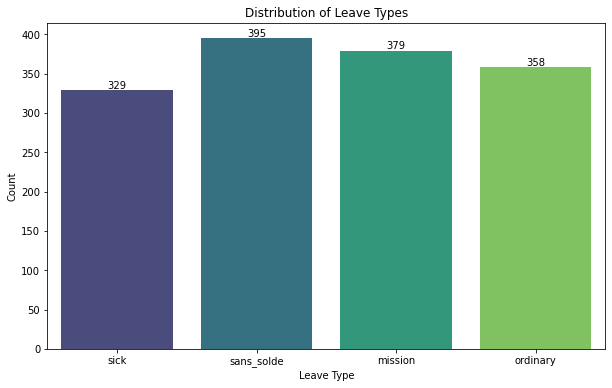

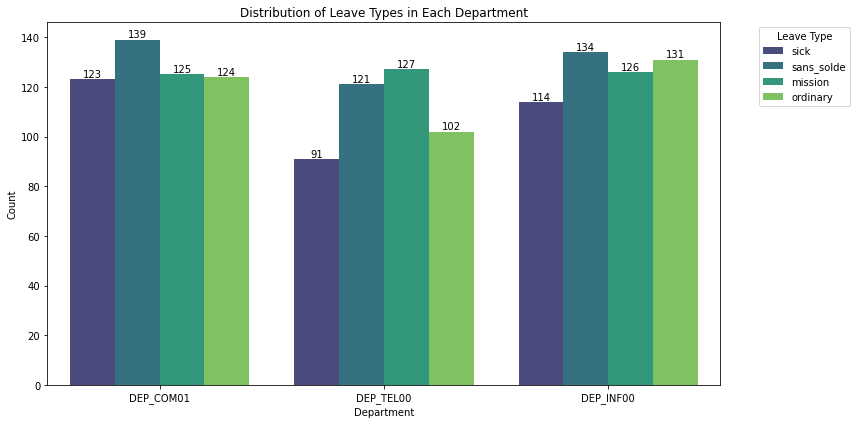

<Figure size 432x288 with 0 Axes>

In [108]:
# 1. Leave Type Analysis
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LEAVE_TYPE', data=df2, palette='viridis')
plt.title('Distribution of Leave Types')
plt.xlabel('Leave Type')
plt.ylabel('Count')

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# 2. Leave Type Analysis in Each Department
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='DEP_ID', hue='LEAVE_TYPE', data=df2, palette='viridis')
plt.title('Distribution of Leave Types in Each Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height): 
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)
plt.legend(title='Leave Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
    
plt.tight_layout()
plt.show()

The data illustrates the distribution of leave types within the organization and across its departments. Across the organization, four main types of leave are observed: sick leave, sans-solde leave (unpaid), mission leave, and ordinary leave. The total counts reveal a relatively balanced distribution among these leave types, with sans-solde leave having the highest count at 395 leaves, followed closely by mission leave at 379 leaves, sick leave at 339 leaves, and ordinary leave at 358 leaves.

When examining the distribution of leave types within each department, distinct patterns emerge. DEP_COM01 exhibits a higher prevalence of sans-solde leaves compared to other types, with 139 leaves recorded. This suggests potential financial or personal reasons driving employees in this department to take unpaid leave. Conversely, DEP_TELOD demonstrates a higher emphasis on ordinary leaves, with 102 leaves recorded, indicating a more typical pattern of absences among its staff. Meanwhile, DEP_INFO0 shows a relatively balanced distribution across leave types, with sick leave, sans-solde leave, mission leave, and ordinary leave having 114, 126, 131, and 134 leaves respectively.

These detailed insights into leave distributions enable departments to better understand their employees' leave patterns and tailor their policies and support mechanisms accordingly. By identifying trends and addressing specific needs within each department, organizations can effectively manage employee absences, maintain productivity, and foster a supportive work environment.

Department: DEP_COM01, Average Leave Balance: 14.22
Department: DEP_INF00, Average Leave Balance: 15.09
Department: DEP_TEL00, Average Leave Balance: 14.81


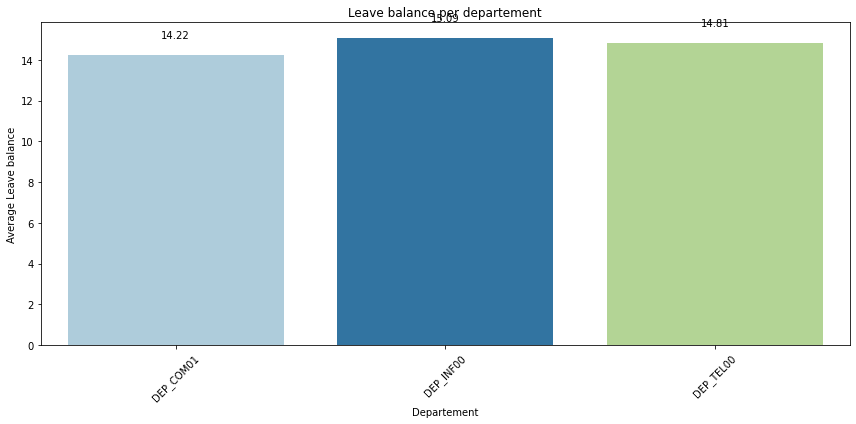

In [113]:
plt.figure(figsize=(12, 6))

# Group by department and calculate the average leave balance
leave_balance_per_department = df2.groupby('DEP_ID')['LEAVE_BALANCE'].mean().reset_index()

# Print the average leave balance for each department
for index, row in leave_balance_per_department.iterrows():
    print(f"Department: {row['DEP_ID']}, Average Leave Balance: {row['LEAVE_BALANCE']:.2f}")

# Plot the bar chart
ax = sns.barplot(x="DEP_ID", y="LEAVE_BALANCE", data=leave_balance_per_department, palette="Paired")
plt.xlabel('Departement')
plt.ylabel('Average Leave balance')
plt.title('Leave balance per departement')
plt.xticks(rotation=45)

# Adding numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 20), 
                 textcoords = 'offset points')

plt.tight_layout()
plt.show()


The data provides insights into the average leave balance per department, indicating the average amount of leave accrued by employees. In DEP_COM01, the average leave balance is 14.22, in DEP_INF00 it is 15.09, and in DEP_TEL00 it is 14.81. These figures shed light on the availability of leave among employees within each department. While the differences in average leave balances are relatively minor, they may reflect varying leave policies, employee utilization of leave, or departmental workload dynamics. Understanding these averages can aid in workforce planning and resource allocation to ensure efficient management of employee leave across departments.

### Vacant positions per departement considering ongoing contracts only:

Vacant Positions by Department:
Department ID: DEP_INF00, Vacant Positions: 346
Department ID: DEP_COM01, Vacant Positions: 1020
Department ID: DEP_TEL00, Vacant Positions: 80


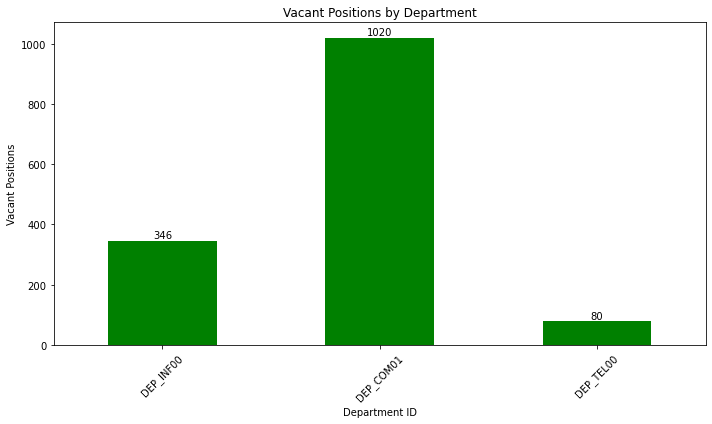

In [110]:
# Filter out employees with ongoing contracts
ongoing_contracts = df2[df2['CONTRACT_END'].isnull()]
employee_count = ongoing_contracts['DEP_ID'].value_counts()

# Merge with department capacity
department_capacity = df5.set_index('ID_DEP')['CAPACITY']
department_capacity = department_capacity.reindex(employee_count.index, fill_value=0)

# Calculate the difference between capacity and employee count
vacant_positions = department_capacity - employee_count

# Display the departments with vacant positions
print("Vacant Positions by Department:")
for dep_id, vacancies in vacant_positions.items():
    if vacancies > 0:
        print(f"Department ID: {dep_id}, Vacant Positions: {vacancies}")
    elif vacancies == 0:
        print(f"Department ID: {dep_id}, All positions filled.")
    else:
        print(f"Department ID: {dep_id}, Excess employees: {abs(vacancies)}")

        # Plotting
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in vacant_positions.values]
vacant_positions.plot(kind='bar', color=colors)
plt.xlabel('Department ID')
plt.ylabel('Vacant Positions')
plt.title('Vacant Positions by Department')
plt.xticks(rotation=45)
plt.tight_layout()

# Add annotations above each bar
for i, v in enumerate(vacant_positions):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom', color='black')

plt.show()

The data presents the number of vacant positions by department, focusing on ongoing contracts. DEP_INF00 has 346 vacant positions, DEP_COM01 has 1020 vacant positions, and DEP_TEL00 has 80 vacant positions. These figures provide valuable insights into staffing needs across departments, indicating areas where recruitment efforts may need to be intensified to fill crucial roles. Notably, the high number of vacant positions in DEP_COM01 suggests a significant staffing gap that may impact departmental operations and productivity. Addressing these vacancies promptly and strategically can help ensure smooth workflow and optimal organizational performance.

### Global interpretation:
The data highlights various aspects of organizational management, including leave distribution, average leave balances per department, and vacant positions across departments. Across the organization, there's a balanced distribution of leave types, with slight variations observed within departments. DEP_COM01 shows a higher prevalence of sans-solde leaves, while DEP_TELOD leans more towards ordinary leaves. Meanwhile, DEP_INFO0 exhibits a relatively balanced distribution across leave types. Understanding these patterns allows departments to tailor policies and support mechanisms to manage employee absences effectively and maintain productivity. Additionally, insights into average leave balances aid in workforce planning and resource allocation. Furthermore, the data on vacant positions underscores the importance of strategic recruitment efforts to fill crucial roles, particularly in departments like DEP_COM01 with a significant staffing gap. Addressing these vacancies promptly can mitigate operational challenges and optimize organizational performance.

### Competences visualisation:

#### Count of Type Diploma in Every Department:

Count of Type Diploma in Every Department:
TYPE_DIPLOMA  Doctoral  Ingeneering  Master
DEP                                        
COMMUN             168          174     169
INFORMATIQUE       160          179     166
TELECOM            172          143     126
Count of Type Diploma in Administration Department:
TYPE_DIPLOMA    Engineer  Licence  Master
DEP                                      
ADMINISTRATION       424      421     434


<Figure size 1400x800 with 0 Axes>

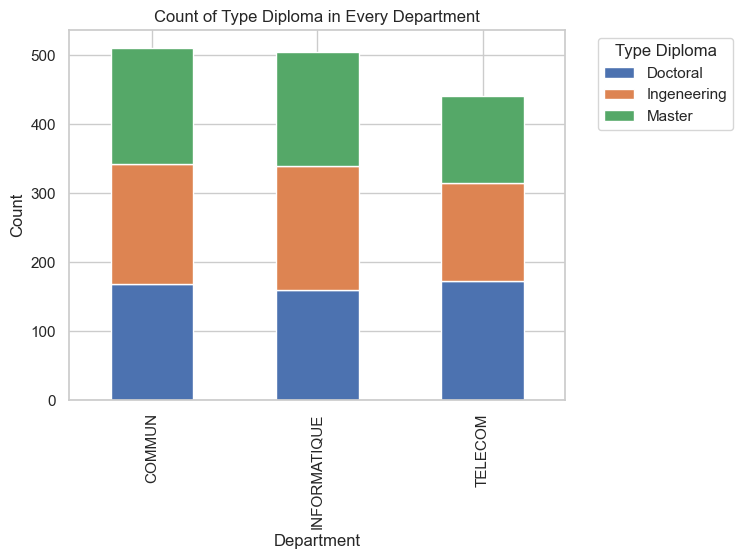

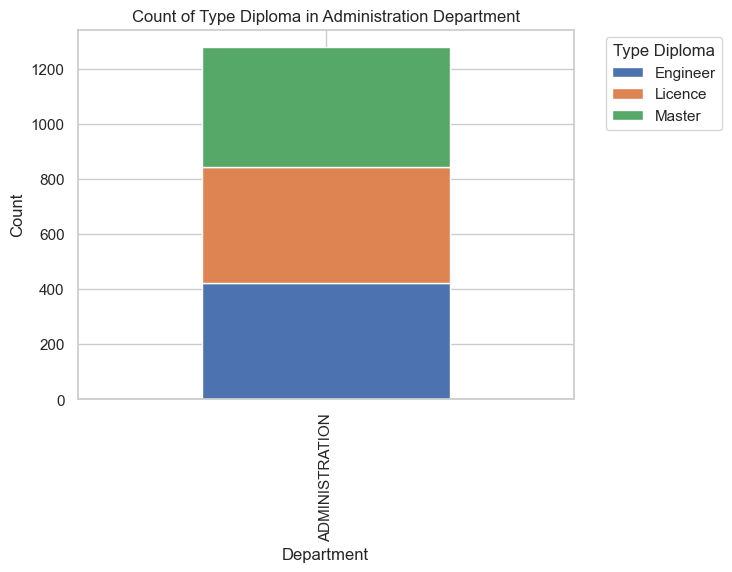

In [25]:
# Merge df1 with df5 to get department names for df2
merged_df2_with_department = pd.merge(df2, df5[['ID_DEP', 'DEP']], left_on='DEP_ID', right_on='ID_DEP', how='left')

# Count the occurrences of each type of diploma in every department
diploma_count_by_department = merged_df2_with_department.groupby(['DEP', 'TYPE_DIPLOMA']).size().unstack(fill_value=0)

# Display the count of each type of diploma in every department
print("Count of Type Diploma in Every Department:")
print(diploma_count_by_department)

# Merge df1 with df5 to get department names for df1
merged_df1_with_department = pd.merge(df1, df5[['ID_DEP', 'DEP']], left_on='DEP_ID', right_on='ID_DEP', how='left')

# Count the occurrences of each type of diploma in every department
diploma_count_by_department1 = merged_df1_with_department.groupby(['DEP', 'TYPE_DIPLOMA']).size().unstack(fill_value=0)

# Display the count of each type of diploma in every department
print("Count of Type Diploma in Administration Department:")
print(diploma_count_by_department1)

#VISUALIZATION

# Use the merged dataframe from the previous code
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Plot a stacked bar chart
diploma_count_by_department.plot(kind='bar', stacked=True)
plt.title('Count of Type Diploma in Every Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Type Diploma', bbox_to_anchor=(1.05, 1), loc='upper left')

diploma_count_by_department1.plot(kind='bar', stacked=True)
plt.title('Count of Type Diploma in Administration Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Type Diploma', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


The data presents the count of different types of diplomas within each department and specifically in the administration department. Across departments, there's variation in the distribution of diploma types. In the communication department (COMMUN), there are relatively similar counts of Doctoral, Ingeneering, and Master's degrees, with counts around 168-174. In the informatique department, there are slightly higher counts of Ingeneering degrees compared to Doctoral and Master's degrees, while in the telecom department, Doctoral degrees have the highest count followed by Ingeneering and then Master's.

In contrast, the administration department shows a more balanced distribution among diploma types, with Engineer, Licence, and Master's degrees each having counts around 420-430. This suggests a diverse educational background among employees in the administration department, which could contribute to a well-rounded skill set and expertise within the department.

* The majority of employees in every departtment have a Master degree then an engeneering degree 
* The majority of administration department employees have a Master degree so you don't need high degrees to get recruited in this department

### Top 10 universities

C:\Users\lando\AppData\Local\Temp\ipykernel_214320\1417231346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_10_diplomas.index, y=top_10_diplomas.values, palette='muted')


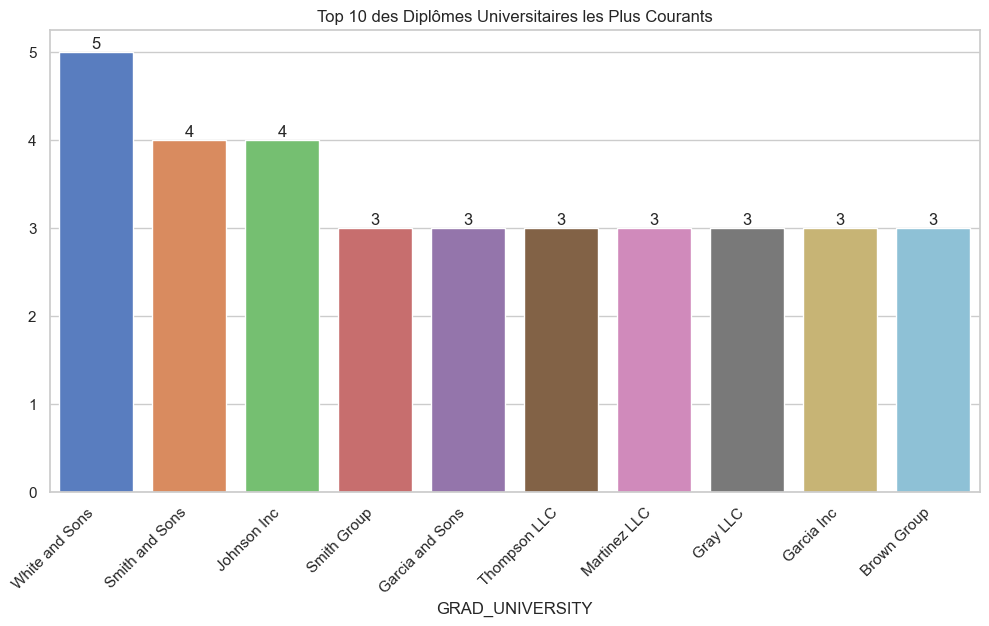

In [26]:
top_10_diplomas = df2['GRAD_UNIVERSITY'].value_counts().nlargest(10)

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_10_diplomas.index, y=top_10_diplomas.values, palette='muted')
plt.title('Top 10 des Diplômes Universitaires les Plus Courants')
plt.xticks(rotation=45, ha='right')

# Ajouter le nombre d'employés au-dessus de chaque barre
for index, value in enumerate(top_10_diplomas.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

plt.show()

### The distribution of technologies per department:

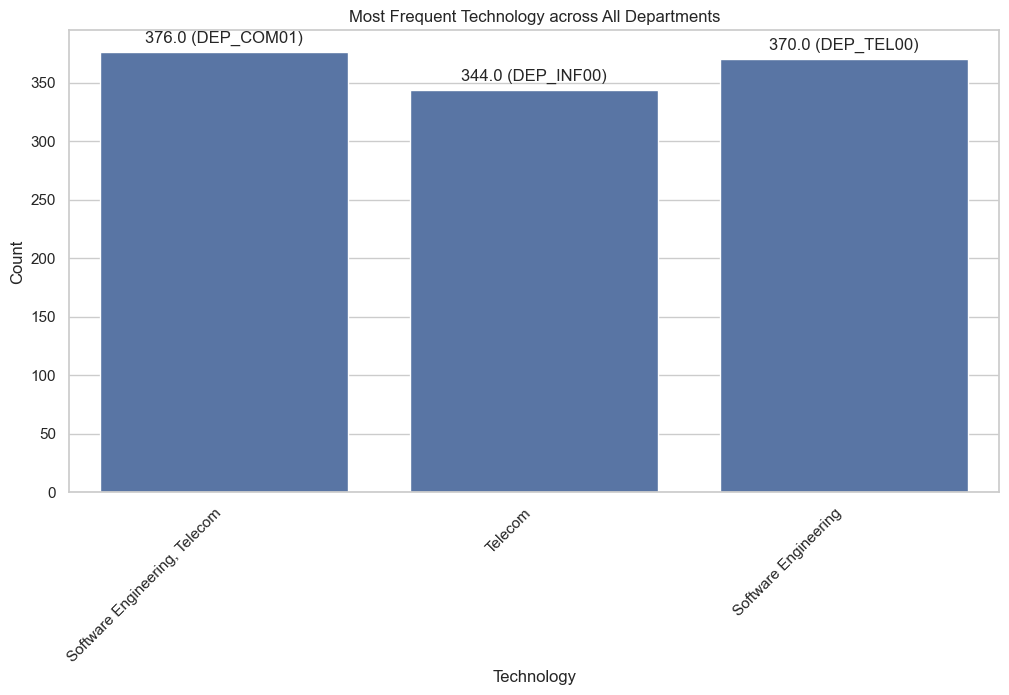

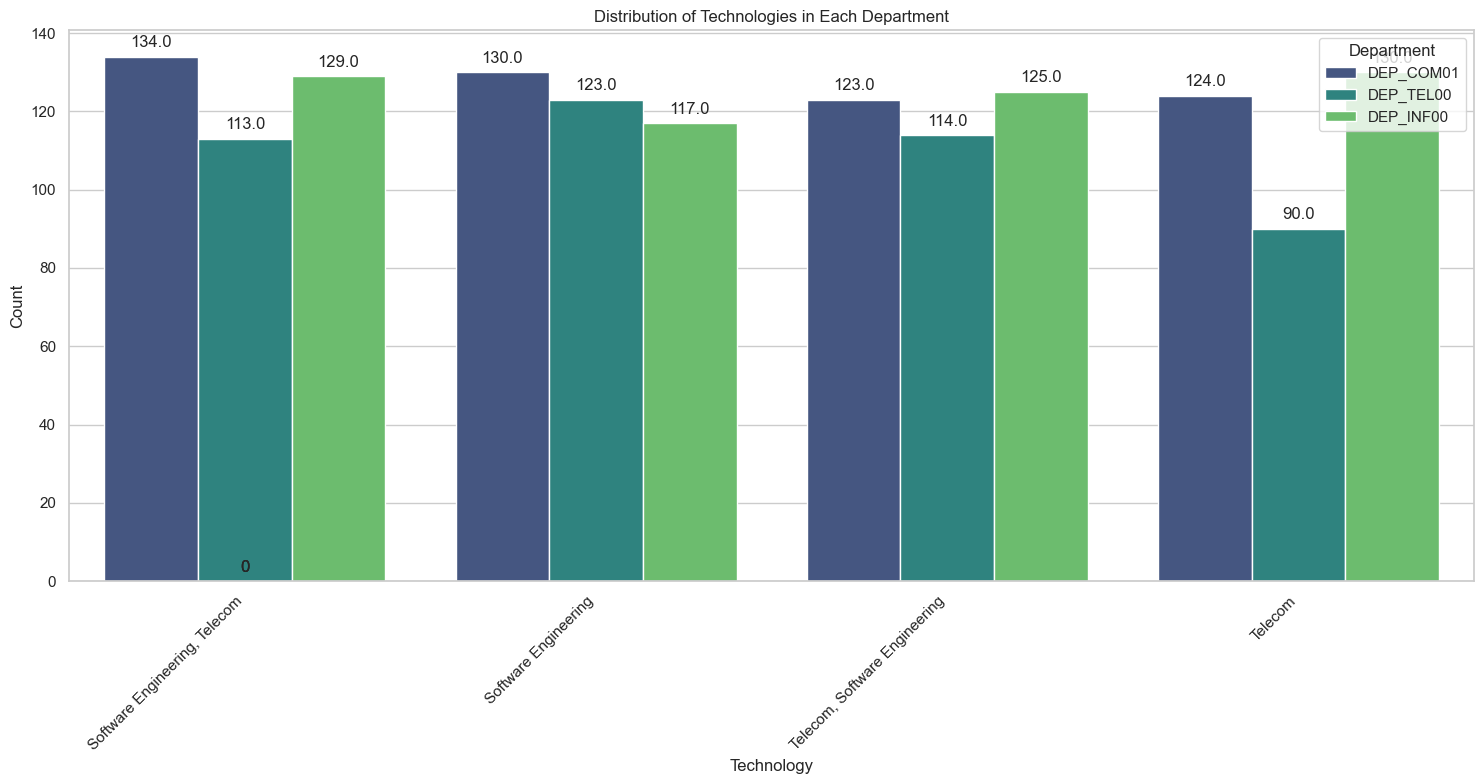

In [27]:
# Grouping by department and finding the most frequent technology
most_frequent_tech = df2.groupby('DEP_ID')['TECHNOLOGIES'].agg(lambda x: x.value_counts().index[0])

# Grouping by department and finding the most frequent technology
most_frequent_tech = df2.groupby('DEP_ID')['TECHNOLOGIES'].agg(lambda x: x.value_counts().index[0])

# Plotting the most frequent technology in all departments
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TECHNOLOGIES', data=df2[df2['DEP_ID'].isin(most_frequent_tech.index)], order=most_frequent_tech.values)
plt.title('Most Frequent Technology across All Departments')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers above each bar and specifying departments
for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({most_frequent_tech.index[ax.patches.index(p)]})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Showing the distribution of technologies in each department
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='TECHNOLOGIES', hue='DEP_ID', data=df2, order=df2['TECHNOLOGIES'].value_counts().index, palette='viridis')
plt.title('Distribution of Technologies in Each Department')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Department')
plt.tight_layout()
plt.show()

#### Language visualization:

1) Administration department:

Language Counts in Every Department (df1):
LANGUAGE     Anglais  Arabe  Francais  Others
DEP_ID                                       
DEP_ADMIN00      814    808       792     793


C:\Users\lando\AppData\Local\Temp\ipykernel_214320\3276506286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df1['LANGUAGE'] = language_df1['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])


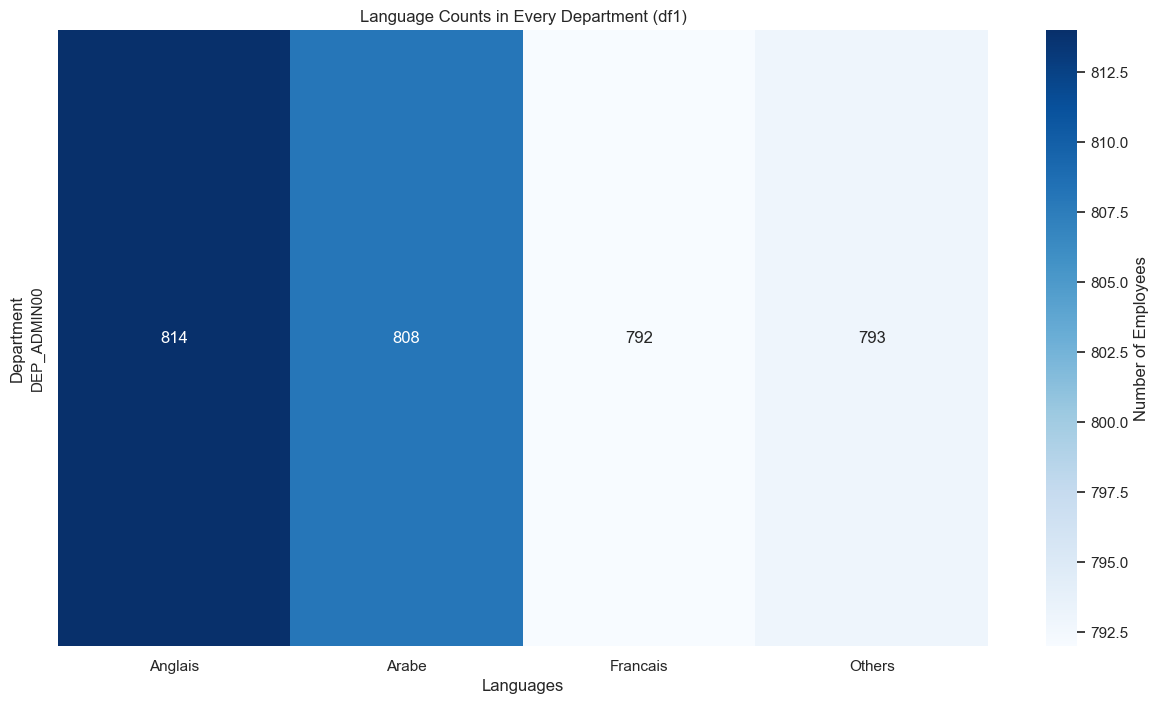

In [28]:
# Select relevant columns from df1
language_df1 = df1[['DEP_ID', 'LANGUAGE']]

# Flatten the list of languages
language_df1['LANGUAGE'] = language_df1['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
language_df1 = language_df1.explode('LANGUAGE')

# Count the occurrences of each language for each department
language_counts = language_df1.groupby(['DEP_ID', 'LANGUAGE']).size().unstack().fillna(0)

# Print the language counts for each department
print("Language Counts in Every Department (df1):")
print(language_counts)

# Plot the language counts for each department
plt.figure(figsize=(15, 8))
sns.heatmap(language_counts, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Employees'})
plt.title('Language Counts in Every Department (df1)')
plt.xlabel('Languages')
plt.ylabel('Department')
plt.show()

2) Other departments:

C:\Users\lando\AppData\Local\Temp\ipykernel_214320\378299128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_df2['LANGUAGE'] = language_df2['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])


Language Counts in Every Department (df2):
LANGUAGE   anglais  arabe  francais  others
DEP_ID                                     
DEP_COM01      311    335       335     323
DEP_INF00      329    299       303     329
DEP_TEL00      263    276       279     295


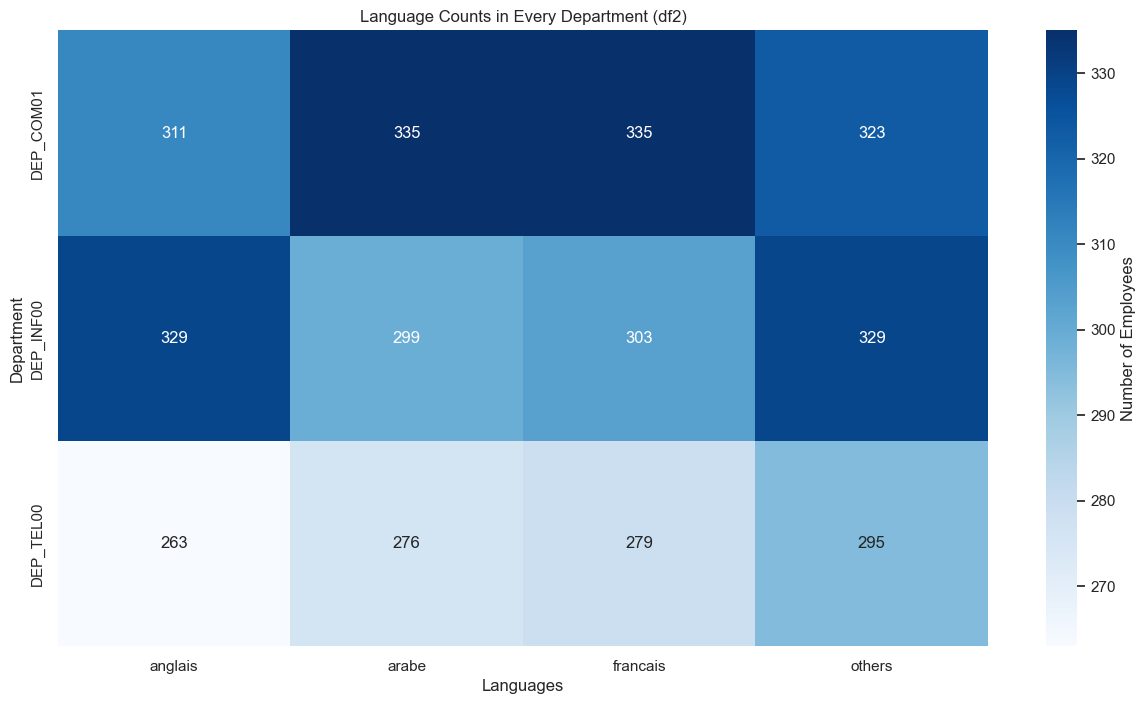

In [29]:
# Select relevant columns from df2
language_df2 = df2[['DEP_ID', 'LANGUAGE']]

# Flatten the list of languages
language_df2['LANGUAGE'] = language_df2['LANGUAGE'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
language_df2 = language_df2.explode('LANGUAGE')

# Count the occurrences of each language for each department
language_counts = language_df2.groupby(['DEP_ID', 'LANGUAGE']).size().unstack().fillna(0)

# Print the language counts for each department
print("Language Counts in Every Department (df2):")
print(language_counts)

# Plot the language counts for each department
plt.figure(figsize=(15, 8))
sns.heatmap(language_counts, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Employees'})
plt.title('Language Counts in Every Department (df2)')
plt.xlabel('Languages')
plt.ylabel('Department')
plt.show()

In conclusion, the analysis of language proficiency within the administration department (df1) and overall other departments (df2) highlights the diverse linguistic landscape of the organization. Within the administration department, there is an equitable distribution of language skills across English, Arabic, French, and other languages. This suggests a well-rounded language proficiency among employees in administrative roles.

Conversely, the language distribution across other departments shows variations, with English being predominant but differences observed in the counts of Arabic, French, and other languages. These disparities may reflect department-specific needs, employee demographics, or the nature of work conducted in each department.

Understanding the language profiles within different departments is crucial for effective communication and collaboration within the organization. It enables targeted language training programs, facilitates interdepartmental interactions, and ensures efficient communication channels. By recognizing and accommodating linguistic diversity, the organization can foster inclusivity, improve teamwork, and enhance overall productivity and precise future recrutement demands.

### Trends of Employee Hiring by Month  :

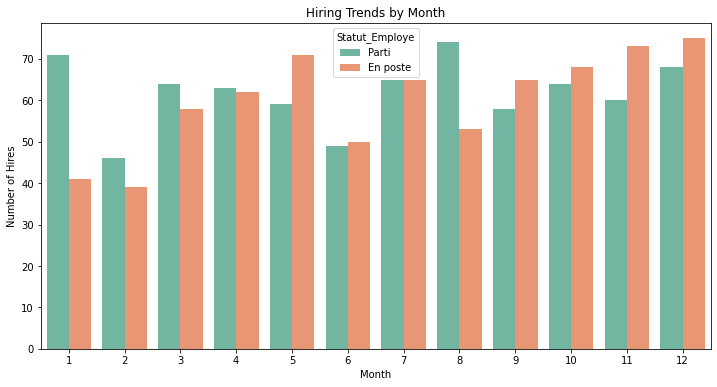

In [138]:
df2['CONTRACT_START'] = pd.to_datetime(df2['CONTRACT_START'])
df2['CONTRACT_END'] = pd.to_datetime(df2['CONTRACT_END'])

# Créer une nouvelle colonne 'Statut_Employe' en utilisant numpy.where
df2['Statut_Employe'] = np.where(df2['CONTRACT_END'].isnull(), 'En poste', 'Parti')


df2['CONTRACT_START_MONTH'] = df2['CONTRACT_START'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='CONTRACT_START_MONTH', data=df2, hue='Statut_Employe', palette='Set2')
plt.title('Hiring Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Hires')
plt.show()

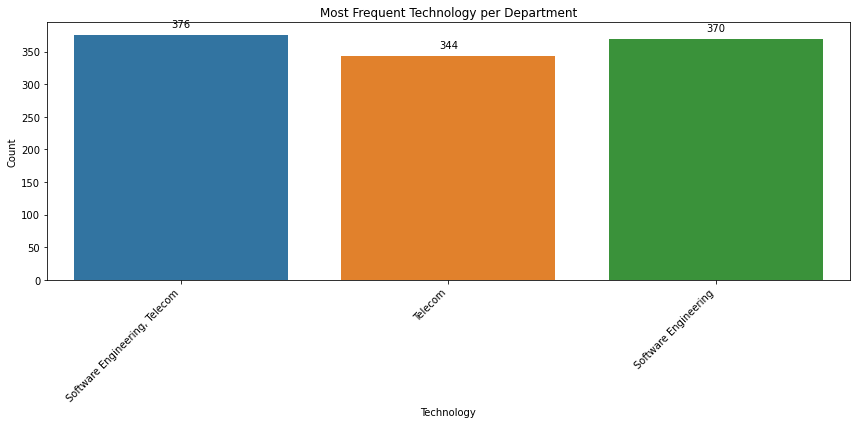

In [114]:
# Group by department and find the most frequent technology
most_frequent_tech = df2.groupby('DEP_ID')['TECHNOLOGIES'].agg(lambda x: x.value_counts().index[0])

# Plotting the most frequent technology in each department
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='TECHNOLOGIES', data=df2[df2['DEP_ID'].isin(most_frequent_tech.index)], order=most_frequent_tech.values)
plt.title('Most Frequent Technology per Department')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

plt.tight_layout()
plt.show()


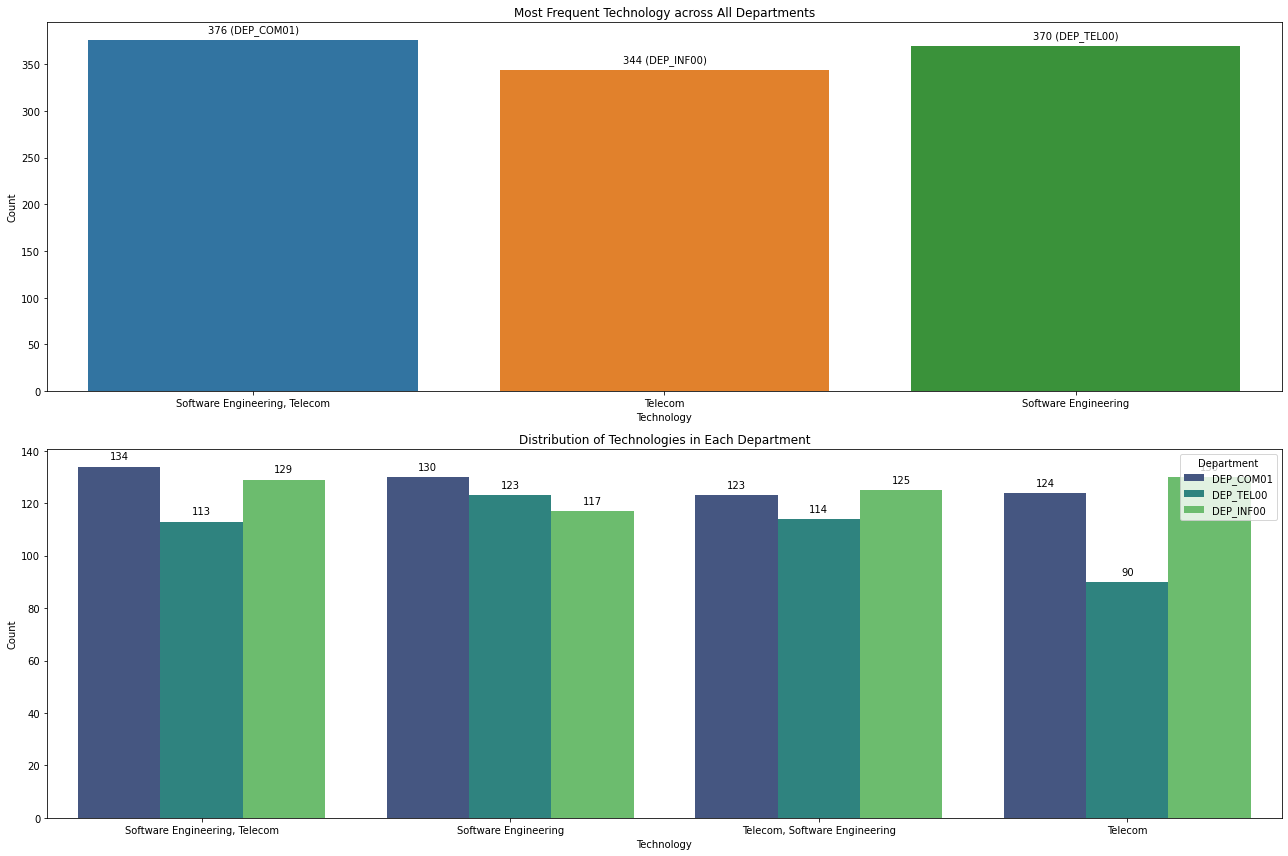

In [122]:
# Grouping by department and finding the most frequent technology
most_frequent_tech = df2.groupby('DEP_ID')['TECHNOLOGIES'].agg(lambda x: x.value_counts().index[0])

# Plotting the most frequent technology in all departments
plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
ax1 = sns.countplot(x='TECHNOLOGIES', data=df2[df2['DEP_ID'].isin(most_frequent_tech.index)], order=most_frequent_tech.values)
plt.title('Most Frequent Technology across All Departments')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers above each bar and specifying departments
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()} ({most_frequent_tech.index[ax1.patches.index(p)]})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Showing the distribution of technologies in each department
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
ax2 = sns.countplot(x='TECHNOLOGIES', hue='DEP_ID', data=df2, order=df2['TECHNOLOGIES'].value_counts().index, palette='viridis')
plt.title('Distribution of Technologies in Each Department')
plt.xlabel('Technology')
plt.ylabel('Count')

# Adding numbers above each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(title='Department')
plt.tight_layout()
plt.show()


## Relationship between Years of Experience and Salary with Trend Line:

### Pairplot of Numerical Variables: 

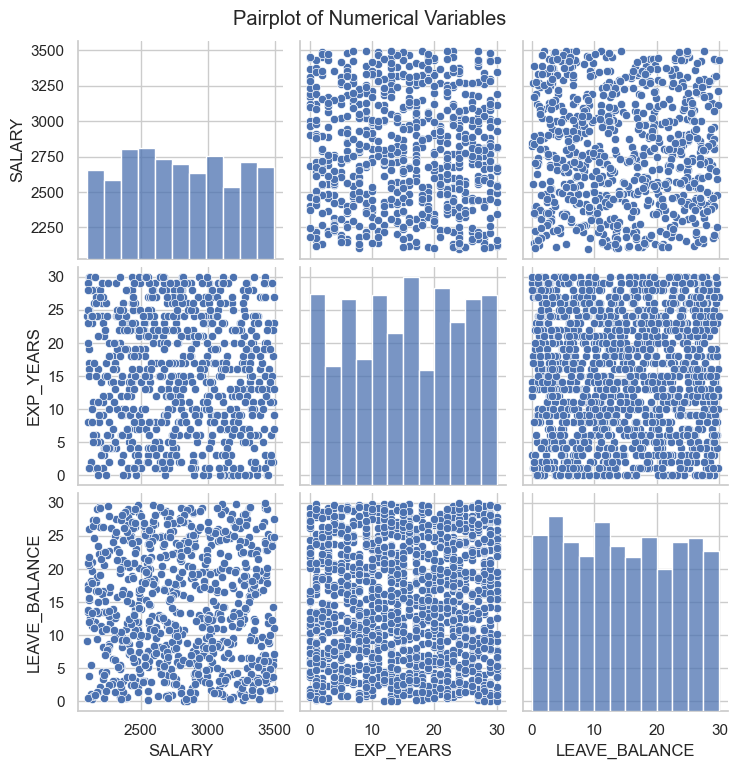

In [50]:
# Pairplot pour visualiser les relations entre variables numériques
sns.pairplot(df2[['SALARY', 'EXP_YEARS', 'LEAVE_BALANCE']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


### activity per Departement:

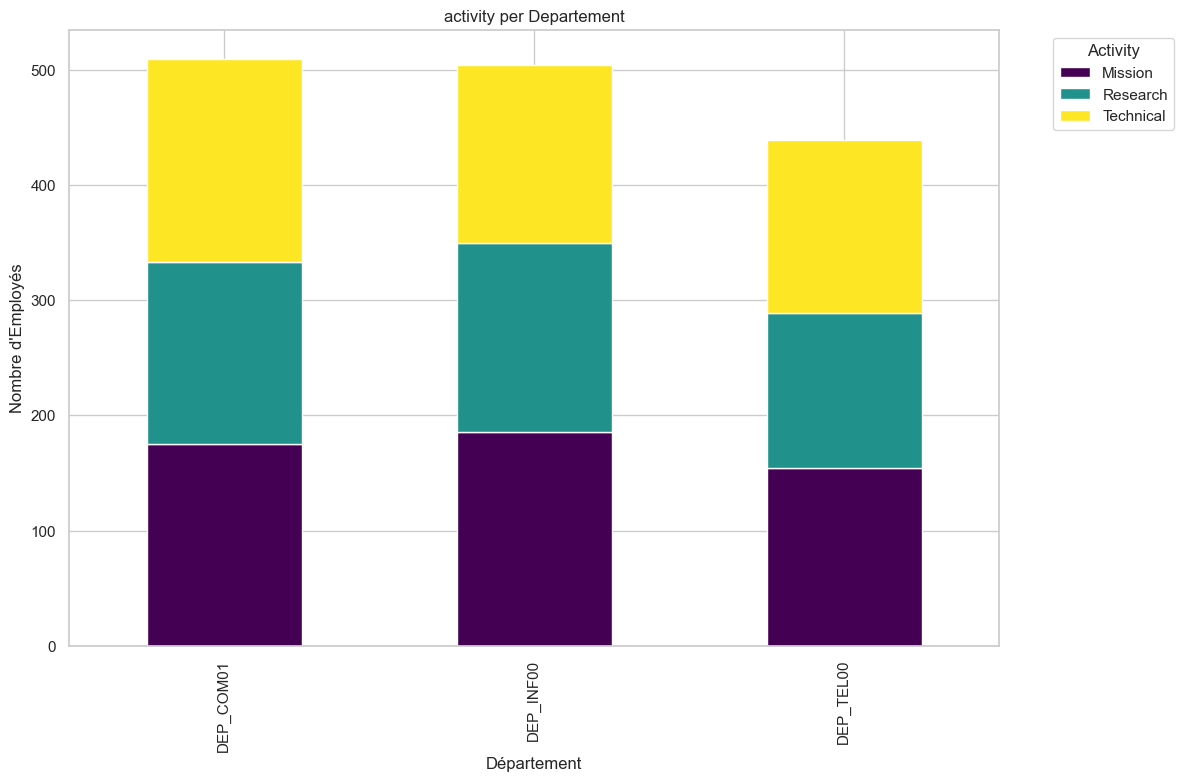

In [48]:
missions_by_department = df2.pivot_table(index='DEP_ID', columns='ACTIVITY', values='NAME_EMP', aggfunc='count')

# Tracer le diagramme à barres empilées
missions_by_department.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('activity per Departement')
plt.xlabel('Département')
plt.ylabel('Nombre d\'Employés')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Overall, all departments present high number of employees engaged in Technical activities, followed by Research, and then Mission work. while the Informatique departmenet  But, the Informatique Department shows higher engagement in Research and Missionary activities than the other departments.

### Top 10 Training Courses per Department Visualization :

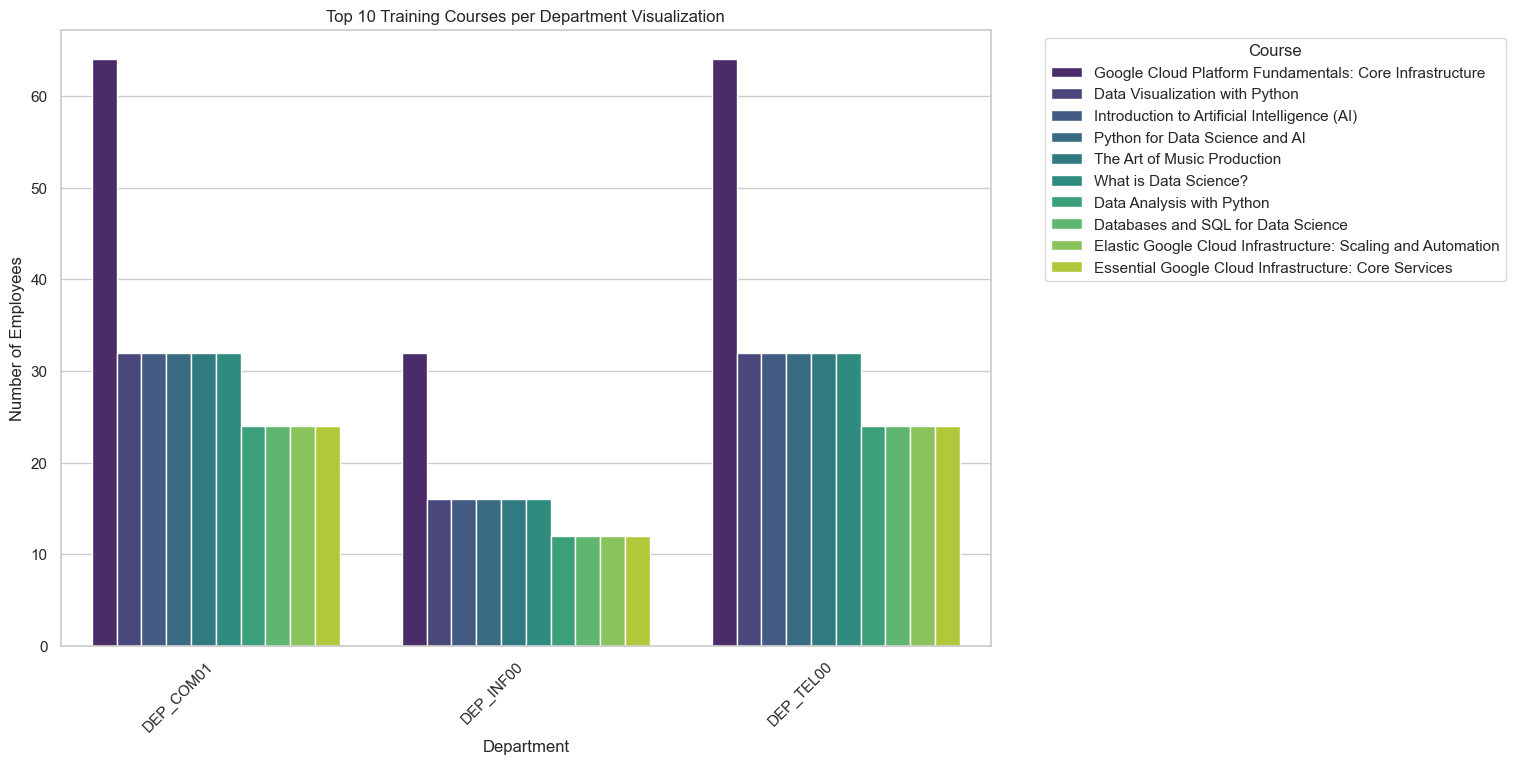

In [49]:
df2['ID_TRAINING'] = df2['ID_TRAINING'].astype(str)
df3['id_course'] = df3['id_course'].astype(str)  # Convert 'id_course' to string type

# Merge the DataFrames on the 'ID_TRAINING' and 'id_course' columns
merged_data = pd.merge(df2, df3, left_on='ID_TRAINING', right_on='id_course', how='left')

# Obtain the list of the top 10 most frequent courses per department
top_10_trainings_by_department = merged_data.groupby(['DEP_ID', 'Course Name']).size().groupby('DEP_ID', group_keys=False).nlargest(10).reset_index(name='Count')

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='DEP_ID', y='Count', hue='Course Name', data=top_10_trainings_by_department, palette='viridis', dodge=True)
plt.title('Top 10 Training Courses per Department Visualization')
plt.xlabel('Department')
plt.ylabel("Number of Employees")
plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


### Correlation Matrix between Numerical Variables

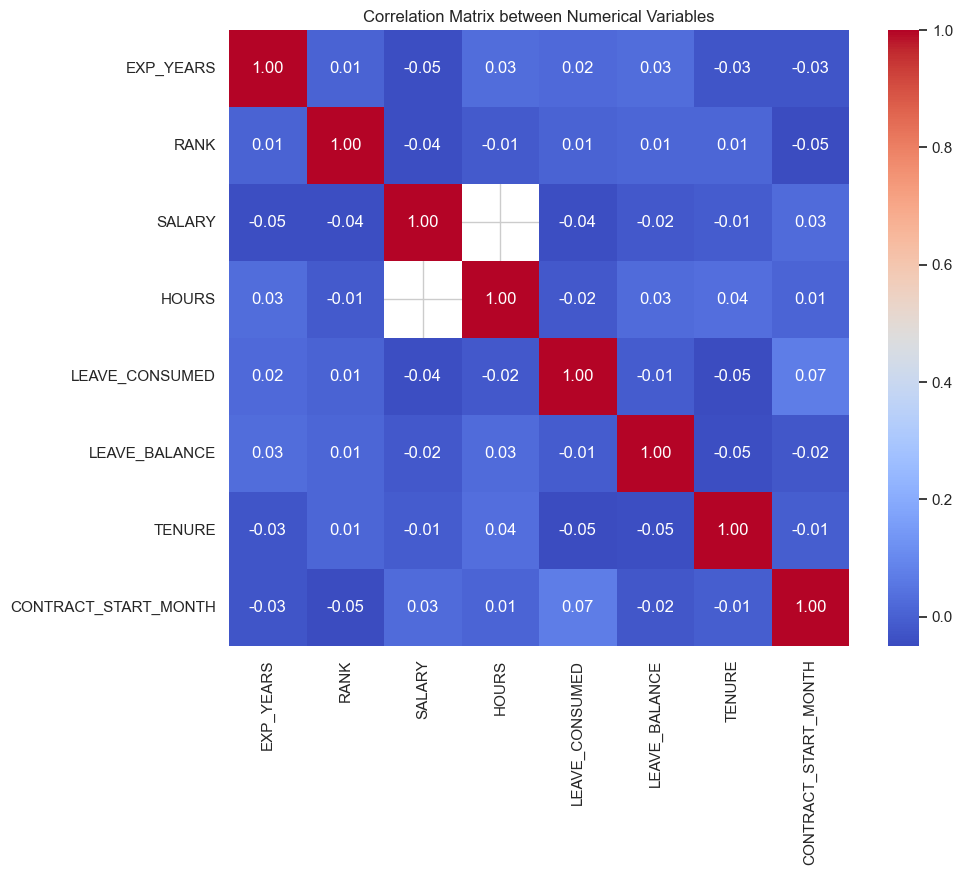

In [56]:
numeric_cols = df2.select_dtypes(include='number')

# Calculer la corrélation
correlation_matrix = numeric_cols.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Numerical Variables')
plt.show()